<a href="https://colab.research.google.com/github/Abhi005838/Capstone_Project_4-Unsupervised/blob/main/AB_Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Online Retail Customer Segmentation



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Contributor**    - Abhishek Bhattarai
##### **Contributor**    - Nikhil Singh
##### **Contributor**    - Jeetendra Thakur
##### **Contributor**    - Kapil Dev Gaur
##### **Contributor**    - Abhishek Bhalla


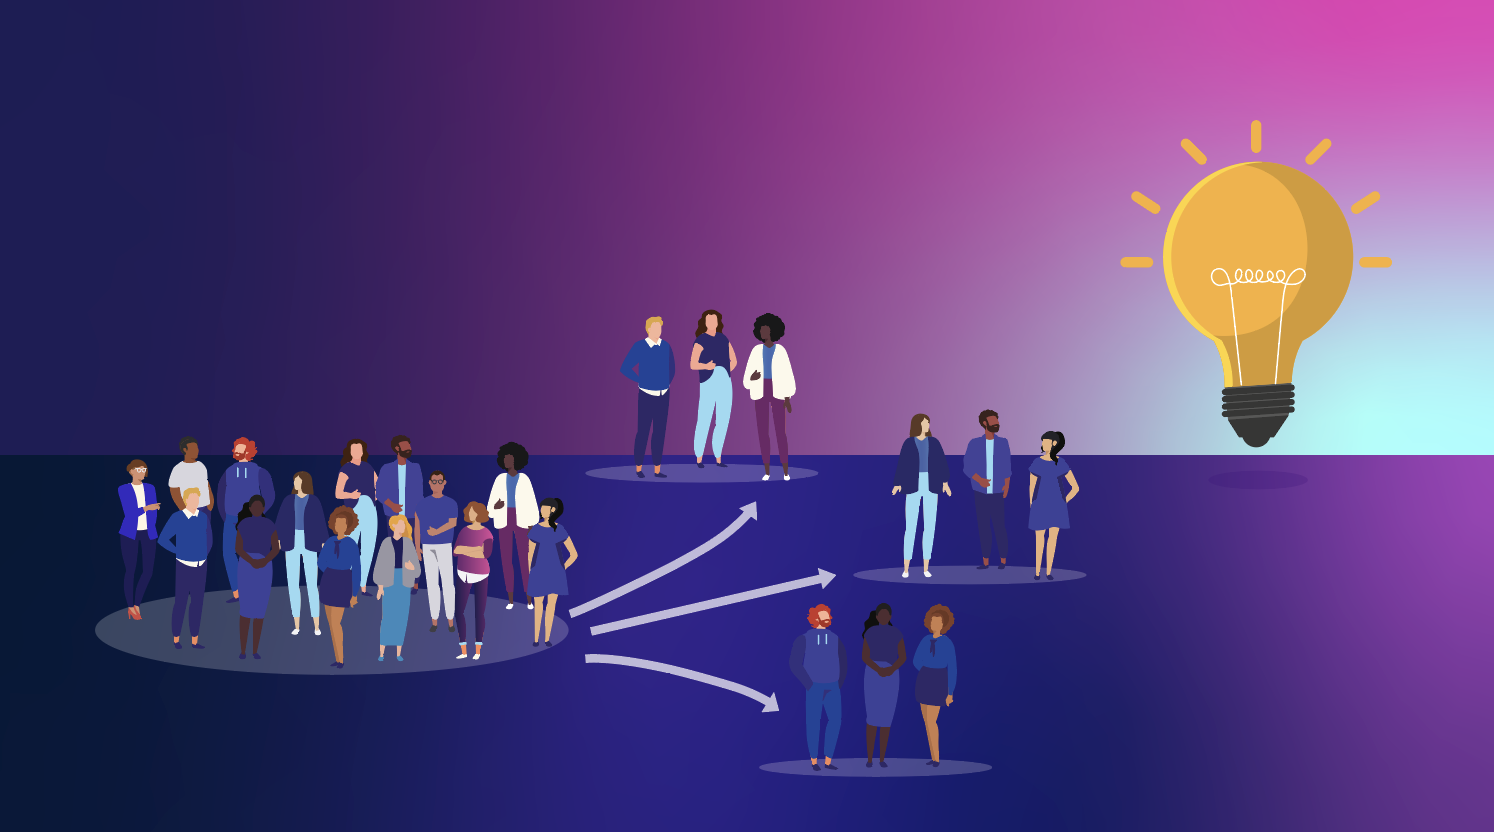

# **Project Summary -**

Unsupervised machine learning (ML) is a subset of ML in which relationships and patterns in data are discovered without the aid of explicit labelling or human supervision. Identifying structure and patterns within data sets without any prior knowledge of what those patterns might be is the aim of unsupervised learning, in other words.

The identification of key client segments is the aim of this project.

The process of segmenting a client base into different groups based on their traits, behaviours, or demographics is known as customer segmentation. This enables companies to personalise their messaging, establish targeted marketing efforts, and enhance the client experience.

There are various methods for segmenting customers, such as:


1. Customer segmentation based on age, gender, income, education, employment, and other demographic characteristics.


2. Customer segmentation based on geography, such as a customer's country, region, city, or postal code.


3. Customer division based on personality, values, beliefs, and lifestyle is known as psychographic segmentation.


4. Customer segmentation based on behaviour, including past purchases, frequency of purchases, brand loyalty, and product use.

Businesses can better understand the requirements and preferences of various groups of customers by segmenting their client base, and they can then customise their marketing efforts to fit those demands. For instance, a company might develop various marketing campaigns for various age groups or geographical areas, or it might provide tailored product recommendations based on past client purchases.

Customer segmentation can be done manually by examining customer data or automatically by machine learning algorithms based on trends in the data. Customer segmentation is a useful tool for firms to enhance their marketing initiatives and offer better customer experiences, regardless of the strategy employed.

# **GitHub Link -**

https://github.com/Abhi005838/Capstone_Project_4-Unsupervised/blob/main/AB_Online_Retail_Customer_Segmentation.ipynb


# **Problem Statement**


Our job in this assignment is to determine the key consumer segments from a multinational data set that includes every transaction made by a UK-based, registered non-store internet retailer between December 1, 2010, and December 9, 2011.The company primarily offers one-of-a-kind gifts for every occasion. The company has a large number of wholesalers as clients.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
import numpy as np                              # for numerical computations
import pandas as pd                             # for data manipulation and analysis

import seaborn as sns                           # for data visualization
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')               # ignore warnings

import datetime as dt                           # to play with datetime object

from wordcloud import WordCloud, STOPWORDS      # to generate word cloud

import random                                   # for random sampling
                           
from scipy.stats import norm                    # For hypothesis testing 

# for model implementation - clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

### Dataset Loading

In [4]:
# Load Dataset
df=pd.read_excel('/content/Online Retail.xlsx')

### Dataset First View

In [5]:
# Dataset First Look
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [6]:
df.tail()

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  
541904 2011-12-09 12:50:00       0.85     12680.0  France  
541905 2011-12-09 12:50:00       2.10     12680.0  France  
541906 2011-12-09 12:50:00       4.15     12680.0  France  
541907 2011-12-09 12:50:00       4.15     12680.0  France  
541908 2011-12-09 12:50:00       4.95     12680.0  France

### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

5268

In [10]:
df.drop_duplicates()

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[536641 rows x 8 columns]

#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
df[df['Description'].isnull()]

InvoiceNo StockCode Description  Quantity         InvoiceDate  \
622       536414     22139         NaN        56 2010-12-01 11:52:00   
1970      536545     21134         NaN         1 2010-12-01 14:32:00   
1971      536546     22145         NaN         1 2010-12-01 14:33:00   
1972      536547     37509         NaN         1 2010-12-01 14:33:00   
1987      536549    85226A         NaN         1 2010-12-01 14:34:00   
...          ...       ...         ...       ...                 ...   
535322    581199     84581         NaN        -2 2011-12-07 18:26:00   
535326    581203     23406         NaN        15 2011-12-07 18:31:00   
535332    581209     21620         NaN         6 2011-12-07 18:35:00   
536981    581234     72817         NaN        27 2011-12-08 10:33:00   
538554    581408     85175         NaN        20 2011-12-08 14:06:00   

        UnitPrice  CustomerID         Country  
622           0.0         NaN  United Kingdom  
1970          0.0         NaN  United Kingdom  
1971          0.0         NaN  United Kingdom  
1972          0.0         NaN  United Kingdom  
1987          0.0         NaN  United Kingdom  
...           ...         ...             ...  
535322        0.0         NaN  United Kingdom  
535326        0.0         NaN  United Kingdom  
535332        0.0         NaN  United Kingdom  
536981        0.0         NaN  United Kingdom  
538554        0.0         NaN  United Kingdom  

[1454 rows x 8 columns]

In [13]:
df=df[df['Description'].notna()]

In [14]:
df[df['Description'].isnull()]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

In [15]:
df[df['CustomerID'].isnull()]

InvoiceNo StockCode                      Description  Quantity  \
1443      536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444      536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445      536544     21786               POLKADOT RAIN HAT          4   
1446      536544     21787            RAIN PONCHO RETROSPOT         2   
1447      536544     21790               VINTAGE SNAP CARDS         9   
...          ...       ...                              ...       ...   
541536    581498    85099B          JUMBO BAG RED RETROSPOT         5   
541537    581498    85099C   JUMBO  BAG BAROQUE BLACK WHITE         4   
541538    581498     85150    LADIES & GENTLEMEN METAL SIGN         1   
541539    581498     85174                S/4 CACTI CANDLES         1   
541540    581498       DOT                   DOTCOM POSTAGE         1   

               InvoiceDate  UnitPrice  CustomerID         Country  
1443   2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1444   2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1445   2010-12-01 14:32:00       0.85         NaN  United Kingdom  
1446   2010-12-01 14:32:00       1.66         NaN  United Kingdom  
1447   2010-12-01 14:32:00       1.66         NaN  United Kingdom  
...                    ...        ...         ...             ...  
541536 2011-12-09 10:26:00       4.13         NaN  United Kingdom  
541537 2011-12-09 10:26:00       4.13         NaN  United Kingdom  
541538 2011-12-09 10:26:00       4.96         NaN  United Kingdom  
541539 2011-12-09 10:26:00      10.79         NaN  United Kingdom  
541540 2011-12-09 10:26:00    1714.17         NaN  United Kingdom  

[133626 rows x 8 columns]

In [16]:
df=df[df['CustomerID'].notna()]

In [17]:
df[df['CustomerID'].isnull()]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

In [18]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

<Axes: >

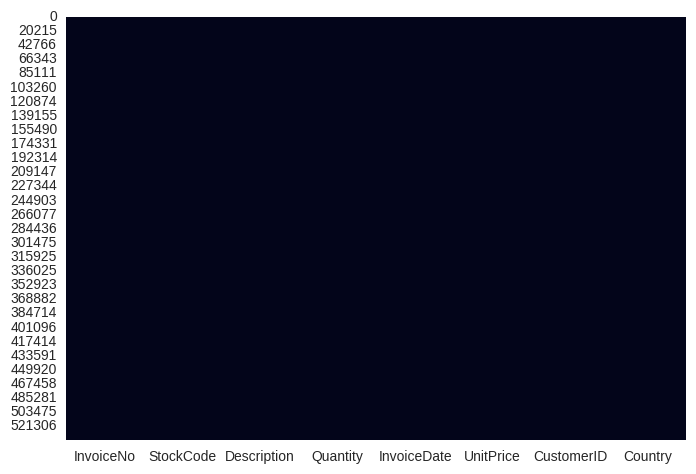

In [19]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

The given dataset comprises 8 columns and 541909 rows in which there are 5268 rows are duplicated and around 25% of the values in the CustomerID column are missing and 0.26% of the Description column's values are null.


## ***2. Understanding Your Variables***

In [20]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [21]:
# Dataset Describe
df.describe()

Quantity      UnitPrice     CustomerID
count  406829.000000  406829.000000  406829.000000
mean       12.061303       3.460471   15287.690570
std       248.693370      69.315162    1713.600303
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13953.000000
50%         5.000000       1.950000   15152.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000   38970.000000   18287.000000

### Variables Description 

**Invoice number:** Invoice number. a 6-digit integral number that is nominal and is assigned to every transaction in a specific way. This code denotes a cancellation if it begins with the letter "c."

**Product (item) code:** StockCode. A 5-digit integral number known as the nominal is assigned to each unique product.

**Description:** Name of the merchandise.

**Quantity:** The numbers of each good (item) in a single transaction.

**InvoiceAs of:** Invice Time and date. the day and time that each transaction was created, expressed as a number.

**UnitPrice:** The cost per unit. Number, sterling price per unit of the product.

**CustomerID:** Client identification. Nominal, a five-digit integral number assigned to every customer separately.

**Name of the country:** The nominal name of the nation that each customer calls home.

### Check Unique Values for each variable.

In [22]:
# Check Unique Values for each variable.
df.nunique()

InvoiceNo      22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
UnitPrice        620
CustomerID      4372
Country           37
dtype: int64

## 3. ***Data Wrangling***

### Remove the duplicated rows as these are not neccessary for our analysis.

In [23]:
# droping duplicates
df.drop_duplicates(inplace = True)

In [24]:
df[df.duplicated()]

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []

### Handling Missing Values

Drop missing values present in 'CustomerID' as we cannot replace it with mode value beacuse it will affect while aggregation.

In [25]:
# droping missing values 'CustomerID' 
df.dropna(subset = ['CustomerID'], inplace=True)

dropping NA in 'CustomerID' column also removed NA in 'Description' column.

In [26]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [27]:
# shape of dataset after removing duplicates and null values
df.shape

(401604, 8)

### InvoiceNo which are starts with 'c' indicates cancellation, create a new dataframe for cancelled transactions for later analysis.

In [28]:
#  converting data type to 'str'
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

# creating separate dataframe for cancelled transactions 
cancel_df = df.loc[df['InvoiceNo'].str.contains('C')]


In [29]:
# Convert InvoiceDate column into 'year','month','day','hour','minute' and second
df['InvoiceDate_year'] = df['InvoiceDate'].dt.year
df['InvoiceDate_month'] = df['InvoiceDate'].dt.month
df['InvoiceDate_day'] = df['InvoiceDate'].dt.day
df['InvoiceDate_hour'] = df['InvoiceDate'].dt.hour
df['InvoiceDate_minute'] = df['InvoiceDate'].dt.minute
df['InvoiceDate_second'] = df['InvoiceDate'].dt.second
print('columns and data types')
pd.DataFrame(df.dtypes).rename(columns = {0:'dtype'})

columns and data types


dtype
InvoiceNo                   object
StockCode                   object
Description                 object
Quantity                     int64
InvoiceDate         datetime64[ns]
UnitPrice                  float64
CustomerID                 float64
Country                     object
InvoiceDate_year             int64
InvoiceDate_month            int64
InvoiceDate_day              int64
InvoiceDate_hour             int64
InvoiceDate_minute           int64
InvoiceDate_second           int64

In [30]:
# cancellation percentage
transaction_count = df.loc[~df['InvoiceNo'].str.contains('C')].shape[0]
cancel_percent = round((cancel_df.shape[0] / transaction_count * 100), 2)
print(f'Approx {cancel_percent}% transactions was cancelled.')

Approx 2.26% transactions was cancelled.


### Approx 2.26% transactions was cancelled.

## 3.1 Data Wrangling checking for outliers

In [31]:
# data summary
df[['Quantity', 'UnitPrice']].describe()

Quantity      UnitPrice
count  401604.000000  401604.000000
mean       12.183273       3.474064
std       250.283037      69.764035
min    -80995.000000       0.000000
25%         2.000000       1.250000
50%         5.000000       1.950000
75%        12.000000       3.750000
max     80995.000000   38970.000000

### ploting distribution chart for 'Quantity' and 'UnitPrice'

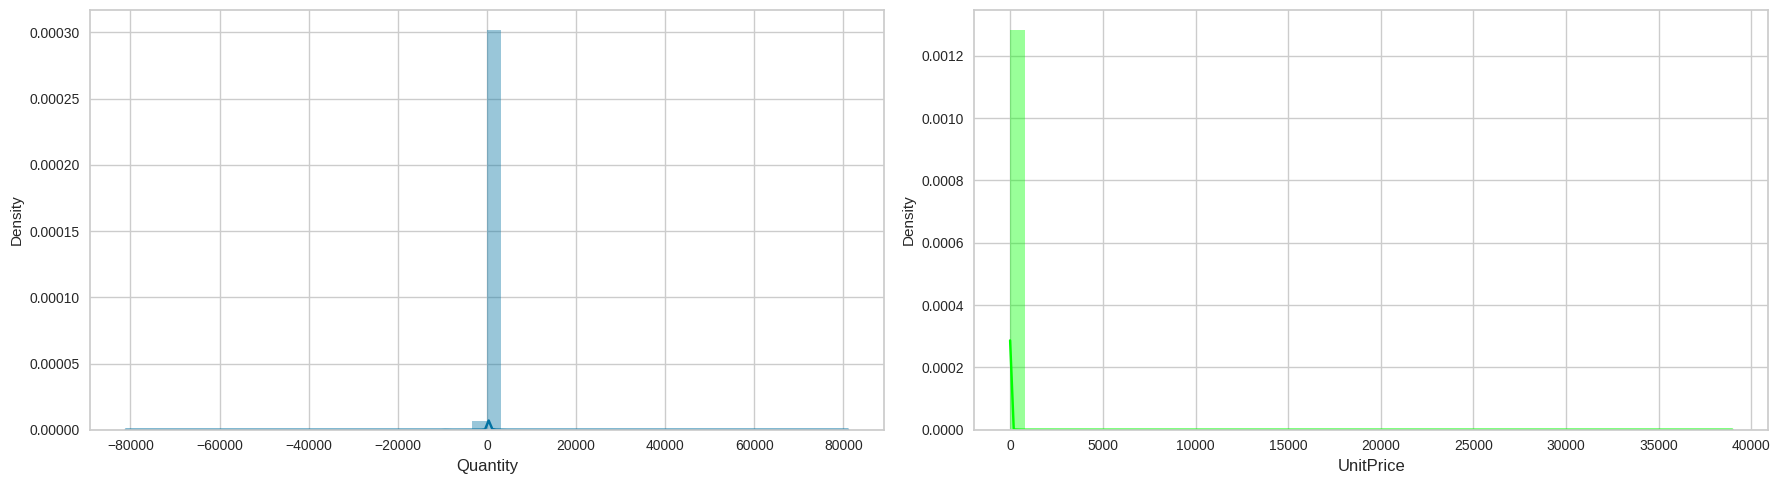

In [32]:
# distribution plot for 'Quantity'
fig = plt.figure(figsize=(18,5))
plt.subplot(1, 2, 1)
plt.xlabel('Quantity', fontsize = 12)
sns.distplot(df['Quantity'])

# distribution plot for 'UnitPrice'
plt.subplot(1, 2, 2)
plt.xlabel('UnitPrice', fontsize = 12)
sns.distplot(df['UnitPrice'],color = 'lime')
plt.tight_layout()

* Quantity column has highly skewed distributions at both side.
* UnitPrice column has highly right skewed distribution.

### ploting box plot to check outliers

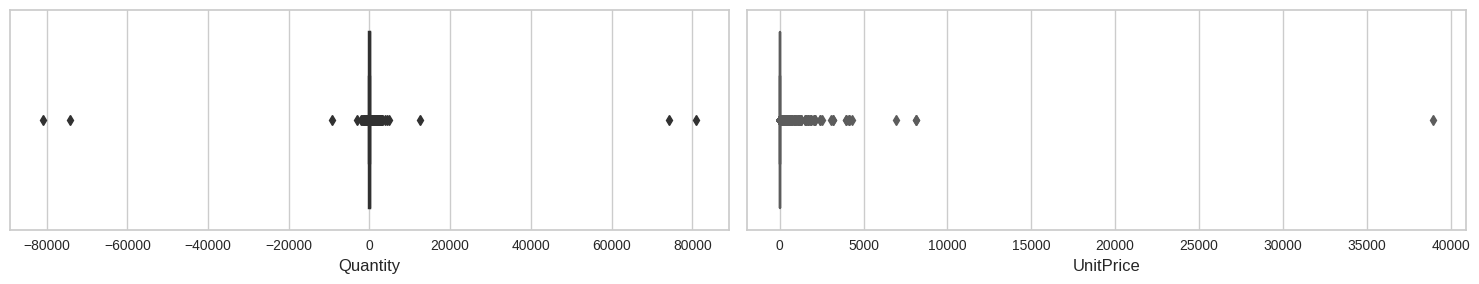

In [33]:
# box plots for 'Quantity'
fig = plt.figure(figsize=(15,3))
plt.subplot(1, 2, 1)
plt.xlabel('Quantity', fontsize = 12)
sns.boxplot(x='Quantity',data=df)

# box plot for 'UnitPrice'
plt.subplot(1, 2, 2)
plt.xlabel('UnitPrice', fontsize = 12)
sns.boxplot(x='UnitPrice',data=df,palette="hls")
plt.tight_layout()

### checking transactions with 'Quantity' more than 5000 and less than -5000.

In [34]:
df[df['Quantity'] > 5000]

InvoiceNo StockCode                     Description  Quantity  \
61619     541431     23166  MEDIUM CERAMIC TOP STORAGE JAR     74215   
502122    578841     84826  ASSTD DESIGN 3D PAPER STICKERS     12540   
540421    581483     23843     PAPER CRAFT , LITTLE BIRDIE     80995   

               InvoiceDate  UnitPrice  CustomerID         Country  \
61619  2011-01-18 10:01:00       1.04     12346.0  United Kingdom   
502122 2011-11-25 15:57:00       0.00     13256.0  United Kingdom   
540421 2011-12-09 09:15:00       2.08     16446.0  United Kingdom   

        InvoiceDate_year  InvoiceDate_month  InvoiceDate_day  \
61619               2011                  1               18   
502122              2011                 11               25   
540421              2011                 12                9   

        InvoiceDate_hour  InvoiceDate_minute  InvoiceDate_second  
61619                 10                   1                   0  
502122                15                  57                   0  
540421                 9                  15                   0

In [35]:
# cancelled transactions
df[df['Quantity'] < -5000]

InvoiceNo StockCode                          Description  Quantity  \
4287     C536757     84347  ROTATING SILVER ANGELS T-LIGHT HLDR     -9360   
61624    C541433     23166       MEDIUM CERAMIC TOP STORAGE JAR    -74215   
540422   C581484     23843          PAPER CRAFT , LITTLE BIRDIE    -80995   

               InvoiceDate  UnitPrice  CustomerID         Country  \
4287   2010-12-02 14:23:00       0.03     15838.0  United Kingdom   
61624  2011-01-18 10:17:00       1.04     12346.0  United Kingdom   
540422 2011-12-09 09:27:00       2.08     16446.0  United Kingdom   

        InvoiceDate_year  InvoiceDate_month  InvoiceDate_day  \
4287                2010                 12                2   
61624               2011                  1               18   
540422              2011                 12                9   

        InvoiceDate_hour  InvoiceDate_minute  InvoiceDate_second  
4287                  14                  23                   0  
61624                 10                  17                   0  
540422                 9                  27                   0

* out of four transactions with extreme 'Quantity' more than 5000 two was already cancelled, maybe these orders was placed by mistake.
* for rest of the extreme quantity values which are less than 5000, cannot consider them as outliers because most of the customers are wholeseller, so it is possible they buy in thousands of quantity.  

#### removing quantity more than 5000 and less than -5000.

In [36]:
# removing quantity more than 5000 and less than -5000.
df = df[(df['Quantity'] < 5000) & (df['Quantity'] > -5000)]

### checking transactions with 'UnitPrice' more than 1000 dollar.

In [37]:
df[(df['UnitPrice'] > 1000) & (~df['InvoiceNo'].str.contains('C'))]

InvoiceNo StockCode     Description  Quantity         InvoiceDate  \
117054    546328         M          Manual         1 2011-03-11 10:19:00   
117055    546329         M          Manual         1 2011-03-11 10:22:00   
144826    548813         M          Manual         1 2011-04-04 13:03:00   
144828    548813         M          Manual         1 2011-04-04 13:03:00   
144829    548820         M          Manual         1 2011-04-04 13:04:00   
145831    548913         M          Manual         1 2011-04-05 09:45:00   
150615    549468         M          Manual         1 2011-04-08 14:27:00   
173382    551697      POST         POSTAGE         1 2011-05-03 13:46:00   
200745    554155         M          Manual         1 2011-05-23 11:26:00   
201553    554301         M          Manual         1 2011-05-23 14:46:00   
297438    562946         M          Manual         1 2011-08-11 09:38:00   
343000    566927         M          Manual         1 2011-09-15 15:20:00   
374542    569382         M          Manual         1 2011-10-03 16:44:00   
406406    571751         M          Manual         1 2011-10-19 11:18:00   
406407    571751         M          Manual         1 2011-10-19 11:18:00   
422351    573077         M          Manual         1 2011-10-27 14:13:00   
422376    573080         M          Manual         1 2011-10-27 14:20:00   
467436    576339       DOT  DOTCOM POSTAGE         1 2011-11-14 15:27:00   
494728    578270       DOT  DOTCOM POSTAGE         1 2011-11-23 13:39:00   
508459    579196       DOT  DOTCOM POSTAGE         1 2011-11-28 15:54:00   
528082    580727       DOT  DOTCOM POSTAGE         1 2011-12-05 17:17:00   

        UnitPrice  CustomerID         Country  InvoiceDate_year  \
117054    1687.17     14911.0            EIRE              2011   
117055    1687.17     14911.0            EIRE              2011   
144826    2382.92     12744.0       Singapore              2011   
144828    1252.95     12744.0       Singapore              2011   
144829    2053.07     12744.0       Singapore              2011   
145831    1136.30     12669.0          France              2011   
150615    1867.86     17940.0  United Kingdom              2011   
173382    8142.75     16029.0  United Kingdom              2011   
200745    1241.98     12757.0        Portugal              2011   
201553    1241.98     12757.0        Portugal              2011   
297438    2500.00     15581.0  United Kingdom              2011   
343000    2033.10     17846.0  United Kingdom              2011   
374542    3155.95     15502.0  United Kingdom              2011   
406406    3949.32     12744.0       Singapore              2011   
406407    2118.74     12744.0       Singapore              2011   
422351    4161.06     12536.0          France              2011   
422376    4161.06     12536.0          France              2011   
467436    1500.36     14096.0  United Kingdom              2011   
494728    1270.06     14096.0  United Kingdom              2011   
508459    1526.76     14096.0  United Kingdom              2011   
528082    1599.26     14096.0  United Kingdom              2011   

        InvoiceDate_month  InvoiceDate_day  InvoiceDate_hour  \
117054                  3               11                10   
117055                  3               11                10   
144826                  4                4                13   
144828                  4                4                13   
144829                  4                4                13   
145831                  4                5                 9   
150615                  4                8                14   
173382                  5                3                13   
200745                  5               23                11   
201553                  5               23                14   
297438                  8               11                 9   
343000                  9               15                15   
374542                 10  

In [38]:
# cancelled transactions
df[(df['UnitPrice'] > 1000) & (df['InvoiceNo'].str.contains('C'))]

InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
45622    C540271         M           Manual        -1 2011-01-06 11:51:00   
73446    C542348         M           Manual        -1 2011-01-27 12:09:00   
117052   C546325         M           Manual        -1 2011-03-11 10:15:00   
117053   C546327         M           Manual        -1 2011-03-11 10:18:00   
144831   C548830         M           Manual        -1 2011-04-04 13:08:00   
144833   C548830         M           Manual        -1 2011-04-04 13:08:00   
144834   C548834         M           Manual        -1 2011-04-04 13:09:00   
145832   C548914         M           Manual        -1 2011-04-05 09:46:00   
150591   C549452         D         Discount        -1 2011-04-08 14:17:00   
173277   C551685      POST          POSTAGE        -1 2011-05-03 12:51:00   
173391   C551699         M           Manual        -1 2011-05-03 14:12:00   
200744   C554154         M           Manual        -1 2011-05-23 11:24:00   
201554   C554302         M           Manual        -1 2011-05-23 14:50:00   
222681   C556445         M           Manual        -1 2011-06-10 15:31:00   
268027   C560372         M           Manual        -1 2011-07-18 12:26:00   
268431   C560420         M           Manual        -1 2011-07-18 15:11:00   
271151   C560647         M           Manual        -1 2011-07-20 11:31:00   
293842   C562647         M           Manual        -1 2011-08-08 12:56:00   
297369   C562938         M           Manual        -1 2011-08-10 17:14:00   
342996   C566925         M           Manual        -1 2011-09-15 15:18:00   
406404   C571750         M           Manual        -1 2011-10-19 11:16:00   
406405   C571750         M           Manual        -1 2011-10-19 11:16:00   
422375   C573079         M           Manual        -2 2011-10-27 14:15:00   
467437   C576338      CRUK  CRUK Commission        -1 2011-11-14 15:27:00   
528087   C580726      CRUK  CRUK Commission        -1 2011-12-05 17:17:00   

        UnitPrice  CustomerID         Country  InvoiceDate_year  \
45622     1126.00     12503.0           Spain              2011   
73446     1715.85     12539.0           Spain              2011   
117052    1687.17     14911.0            EIRE              2011   
117053    1687.17     14911.0            EIRE              2011   
144831    2382.92     12744.0       Singapore              2011   
144833    1252.95     12744.0       Singapore              2011   
144834    2053.07     12744.0       Singapore              2011   
145832    1136.30     12669.0          France              2011   
150591    1867.86     17940.0  United Kingdom              2011   
173277    8142.75     16029.0  United Kingdom              2011   
173391    6930.00     16029.0  United Kingdom              2011   
200744    1241.98     12757.0        Portugal              2011   
201554    1241.98     12757.0        Portugal              2011   
222681   38970.00     15098.0  United Kingdom              2011   
268027    4287.63     17448.0  United Kingdom              2011   
268431    1592.49     15369.0  United Kingdom              2011   
271151    3060.60     18102.0  United Kingdom              2011   
293842    3155.95     15502.0  United Kingdom              2011   
297369    1121.18     14156.0            EIRE              2011   
342996    1829.84     12748.0  United Kingdom              2011   
406404    3949.32     12744.0       Singapore              2011   
406405    2118.74     12744.0       Singapore              2011   
422375    4161.06     12536.0          France              2011   
467437    1038.75     14096.0  United Kingdom              2011   
528087    1100.44     14096.0  United Kingdom              2011   

        InvoiceDate_month  InvoiceDate_day  InvoiceDate_hour  \
45622                   1                6                11   
73446                   1               27                12   
117052                  3               11                10   
11705

### The majority of transactions involving "UnitPrice" that totaled more than 1000 were already cancelled, and the majority of their descriptions mention "manual," which may indicate that these were made specifically at the request of the customer and as a result, their price may be higher than the going rate.


### creating new variable 'TotalPrice' by multiplying 'Quantity' and 'UnitPrice'

In [39]:
# creating new variable 'TotalPrice'
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

### Creating new columns by extracting different datetime components from 'InvoiceDate' for time series analysis. 

In [40]:
# extracting only date from InvoiceDate.
df['date'] = df['InvoiceDate'].dt.date

# extracting 'year' from 'InvoiceDate'
df['year'] = df['InvoiceDate'].dt.year

# extracting 'month' from 'InvoiceDate'
df['month'] = df['InvoiceDate'].dt.strftime('%b')

# extracting 'day' from 'InvoiceDate'
df['day'] = df['InvoiceDate'].dt.day

# extracting 'weekday' from 'InvoiceDate'
df['weekday'] = df['InvoiceDate'].dt.day_name()

# extracting 'hour' from 'InvoiceDate'
df['hour'] = df['InvoiceDate'].dt.hour

In [41]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   

   InvoiceDate_year  InvoiceDate_month  ...  InvoiceDate_hour  \
0              2010                 12  ...                 8   
1              2010                 12  ...                 8   
2              2010                 12  ...                 8   
3              2010                 12  ...                 8   
4              2010                 12  ...                 8   

   InvoiceDate_minute  InvoiceDate_second  TotalPrice        date  year  \
0                  26                   0       15.30  2010-12-01  2010   
1                  26                   0       20.34  2010-12-01  2010   
2                  26                   0       22.00  2010-12-01  2010   
3                  26                   0       20.34  2010-12-01  2010   
4                  26                   0       20.34  2010-12-01  2010   

   month day    weekday hour  
0    Dec   1  Wednesday    8  
1    Dec   1  Wednesday    8  
2    Dec   1  Wednesday    8  
3    Dec   1  Wednesday    8  
4    Dec   1  Wednesday    8  

[5 rows x 21 columns]

In [42]:
# shape of dataset after removing duplicates, null values and outliers.
df.shape

(401598, 21)

### What all manipulations have you done and insights you found?

* Duplicate rows and null values were eliminated.
* Any invoice number that begins with a 'c' denotes cancellation.
* About 2.26% of transactions were reversed.
* 401598 rows remained after null values and duplicate entries were eliminated.
* Multiplied quantity and unit price to generate a new variable called      "TotalPrice."
* 'InvoiceDate' was mined for various datetime components, and new columns were created for time series analysis.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Total Unique Product Count.

In [43]:
# Unique StcockCode count
product_count = df['StockCode'].nunique()
print(f'There are total {product_count} different products.')

There are total 3683 different products.


#### Chart - 1- Top 10 products with highest number of quantity sold.

<Axes: title={'center': 'Top 10 products by number of quantity sold'}, xlabel='StockCode', ylabel='Quantity'>

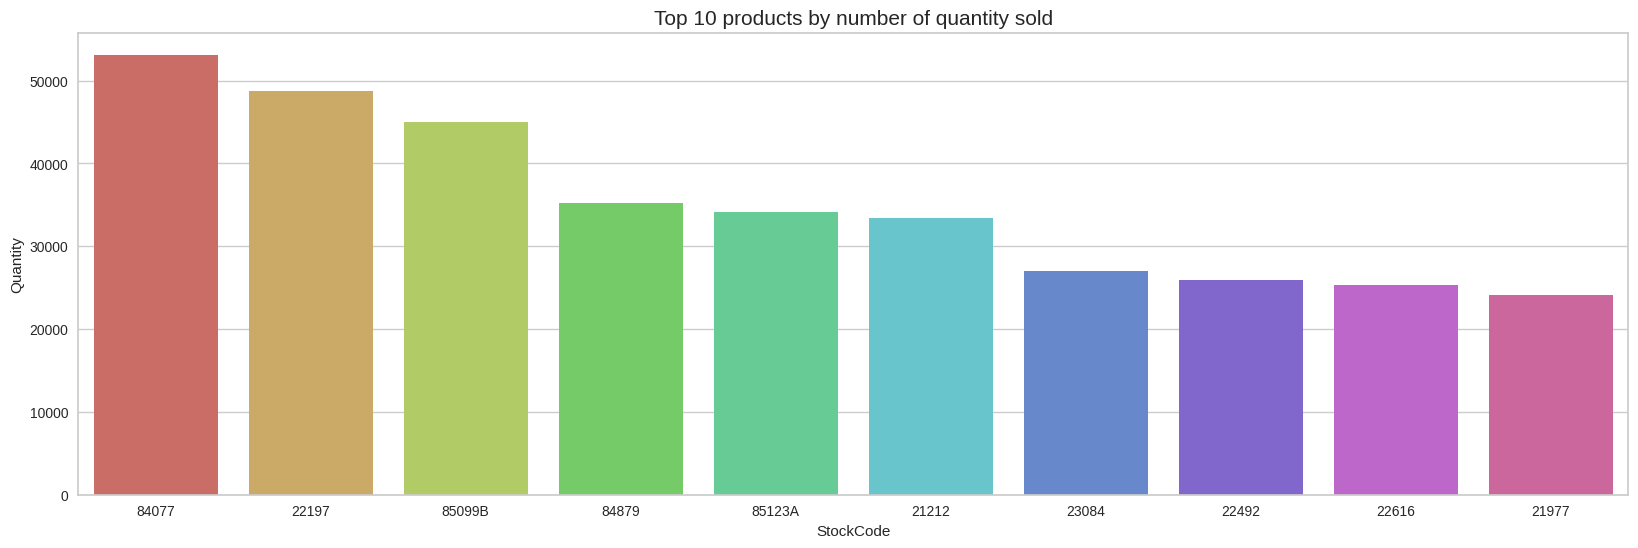

In [44]:
# Total Quantity sold by each product
total_quantity_sold = df.groupby(['StockCode'])['Quantity'].sum().reset_index().sort_values('Quantity', ascending=False).reset_index(drop=True)

# ploting bar chart for top 10 products
plt.figure(figsize=(20,6))
plt.title('Top 10 products by number of quantity sold', fontdict={'size': 15})
sns.barplot(x='StockCode',y='Quantity',data=total_quantity_sold.head(10),palette="hls")

In [45]:
# products with low quantity 
total_quantity_sold.tail(10)

StockCode  Quantity
3673     22769        -4
3674     21412        -6
3675     35400        -6
3676     20703        -6
3677    79323W        -8
3678     22034        -9
3679     21144       -12
3680      CRUK       -16
3681     21645       -24
3682         D     -1194

In [46]:
#  Number of products with less than 10 quantity sold
least_count = (total_quantity_sold[(total_quantity_sold['Quantity'] < 10)].shape)[0]
print(f'Number of products with less than 10 quantity sold is {least_count}')

Number of products with less than 10 quantity sold is 376


##### 1. Why did you pick the specific chart?


Bar charts are an effective technique for visualising data that makes it simpler to compare and comprehend big volumes of data.


##### 2. What is/are the insight(s) found from the chart?

A total of 3683 different goods are available. The most popular product, with a total quantity sold of over 50000, has the stockcode '84077'.
 The second and third most popular products, with a total quantity sold of over 40000, are those with the stockcodes "2219" and "85099B," respectively. By far the 10th most popular product, the minimum number sold is almost 24000. Additionally, there are more than 300 products sold in quantities of less than 10.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the top ten products are doing very well. Businesses can keep extra supplies of these items and even try raising their prices to boost profits.
There are over 300 products with less than 10 total sales; we must determine whether these products are worthwhile to keep in order to avoid a decline in business growth.


#### Chart - 2 Top most and least count of products.

<Axes: title={'center': 'top 20 most frequent products'}, xlabel='count', ylabel='StockCode'>

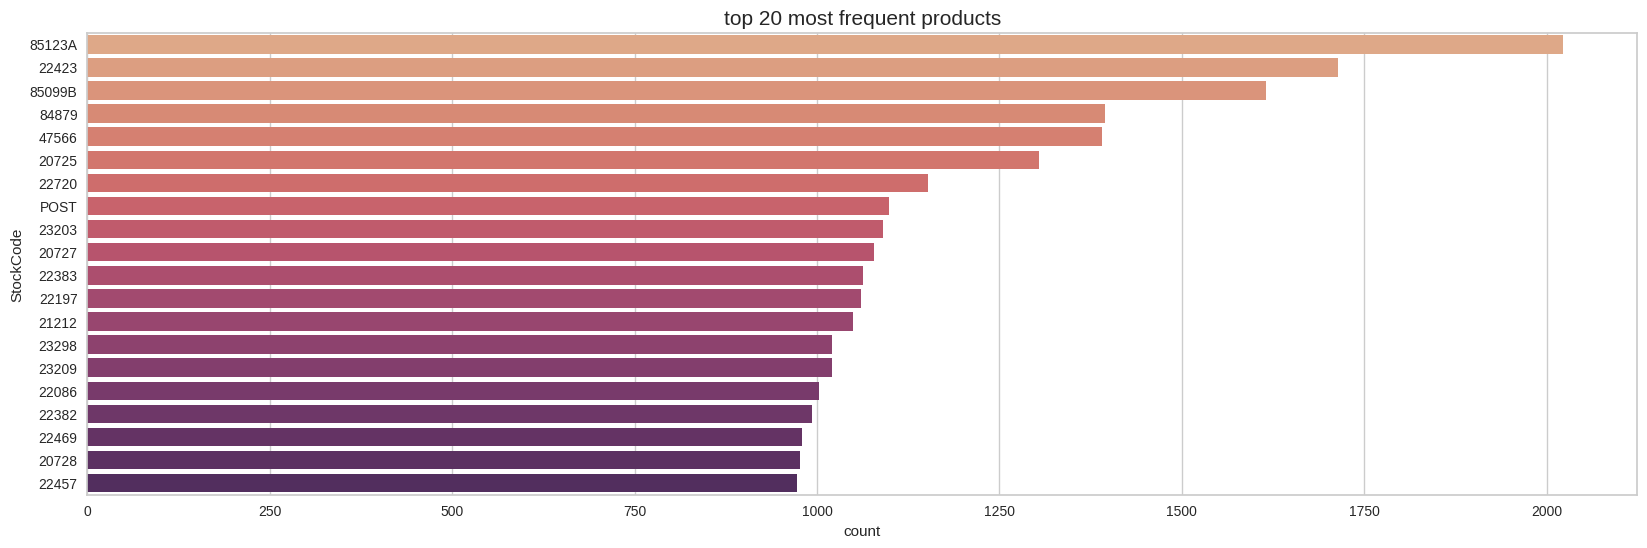

In [47]:
# transaction count for each product
count_df = df[df['Quantity'] > 0].groupby(['StockCode']).StockCode.count().reset_index(name='count').sort_values(['count'], ascending=False).reset_index(drop = True)

# ploting horizontal bar chart for top 20 most frequent products
plt.figure(figsize=(20,6))
plt.title('top 20 most frequent products', fontdict={'size': 15})
sns.barplot(y='StockCode',x='count',data=count_df.head(20),orient = 'h',palette="flare")

In [48]:
# least frequent products with total transaction count less than 5
least_count = (count_df[(count_df['count'] < 5)].shape)[0]
print(f'Products with total transaction count less than 5 is {least_count}')

Products with total transaction count less than 5 is 475


##### 1. Why did you pick the specific chart?

A form of chart called a horizontal bar graph shows data by using horizontal bars to represent numbers. They are helpful for visually representing comparisons between categories because the length of the bar indicates the category's value.




##### 2. What is/are the insight(s) found from the chart?

* Some of the most popular products have a total transaction count of more than 1300, including 85123A, 22423, 85099B, 84879, 20725, and 47566. * The number of least popular products with a total transaction count of fewer than 5 is over 400.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Since the aforementioned items are the most frequently purchased, businesses should always have them in stock. This will increase availability and have a positive impact on their bottom line.

* There are more than 400 least popular products with a total transaction count of fewer than 5, and keeping them in stock wastes space and could harm the company. 


#### Chart - 3 Most expensive products and their quantity sold.

In [49]:
# extracting the 'StockCode' and their 'UnitPrice'
non_regular_stockcodes = ['BANK CHARGES', 'C2', 'CRUK', 'D', 'DOT', 'M', 'PADS', 'POST']
unit_price_df = df[(~df['StockCode'].isin(non_regular_stockcodes))].groupby(['StockCode'])['UnitPrice'].agg(lambda x: pd.Series.mode(x)[0]).to_frame().sort_values('UnitPrice', ascending = False).reset_index()
unit_price_df = pd.merge(unit_price_df, total_quantity_sold, on = 'StockCode')

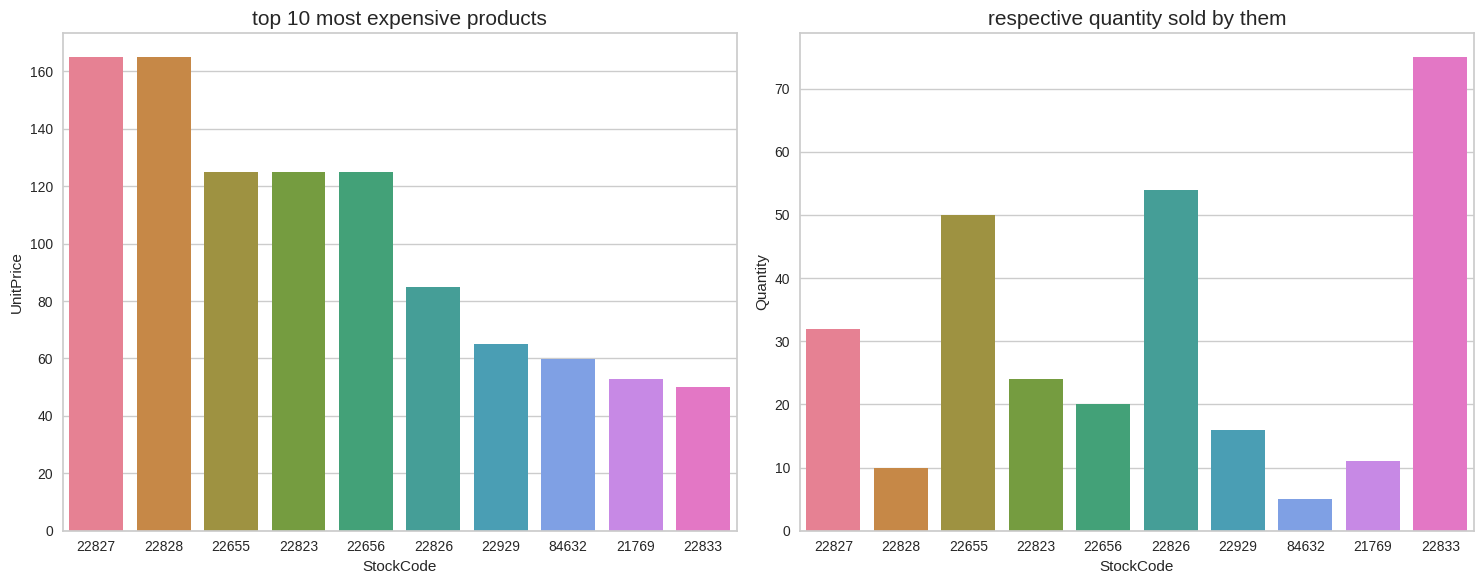

In [50]:
# defining figure size
fig = plt.figure(figsize=(15,6))
# ploting bar chart for top 10 most expensive products
plt.subplot(1, 2, 1)
plt.title('top 10 most expensive products', fontdict={'size': 15})
sns.barplot(x='StockCode',y='UnitPrice',data=unit_price_df.head(10), order=unit_price_df['StockCode'].head(10),palette="husl")

# ploting qunatity sold by each of 10 most expensive products'
plt.subplot(1, 2, 2)
plt.title('respective quantity sold by them', fontdict={'size': 15})
sns.barplot(x='StockCode',y='Quantity',data=unit_price_df.head(10), order=unit_price_df['StockCode'].head(10),palette="husl")
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Bar chart is good for visualising the data.

##### 2. What is/are the insight(s) found from the chart?

Most expensive products are 22828 and 22827 with unit price of 165 dollar.
22833 is 10th most expensive product with unit price of 49.95 dollar but it has highest quantity sold of 149 units among all 10 most expensive.
lowest quantity sold by 84632 which is 8th most expensive product with unit price of 59.95 and qunatity sold is only 5 units.

#### Chart - 4 Least expensive products and their quantity sold.

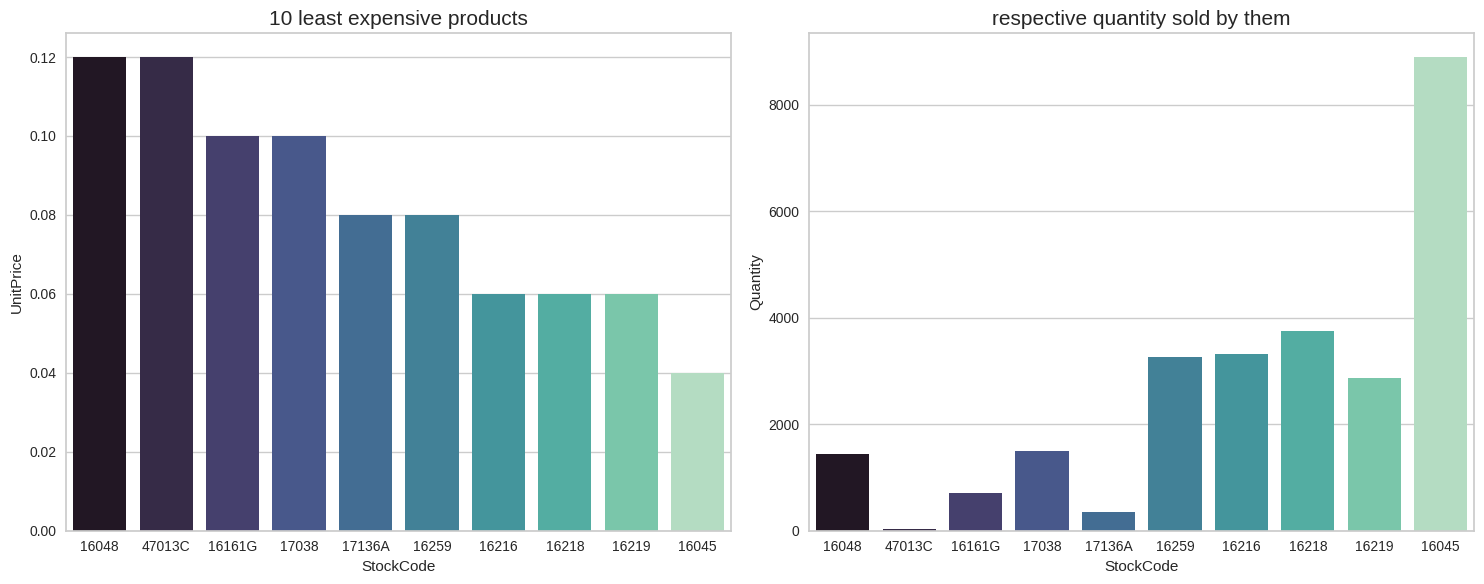

In [51]:
# defining figure size
fig = plt.figure(figsize=(15,6))
# ploting bar chart for 10 least expensive products
plt.subplot(1, 2, 1)
plt.title('10 least expensive products', fontdict={'size': 15})
sns.barplot(x='StockCode',y='UnitPrice',data=unit_price_df.tail(10),palette="mako")

# ploting qunatity sold by each of 10 least expensive products'
plt.subplot(1, 2, 2)
plt.title('respective quantity sold by them', fontdict={'size': 15})
sns.barplot(x='StockCode',y='Quantity',data=unit_price_df.tail(10),palette="mako")
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Bar chart helps us to understand each variable.

##### 2. What is/are the insight(s) found from the chart?

16045 and 16219 are least expensive products with unit price of 0.04 and 0.06 dollars respectively.
16045 is cheapest product among all but it has highest quantity sold of 8900 among all 10 least expensive products.
47013C has lowest qunatity sold of 31 units only with unit price of 0.12 dollar only.

#### Chart - 5 Top 10 products with highest sales volume.

<Axes: title={'center': '8.28% of total sale is made by top 10 products '}, xlabel='StockCode', ylabel='TotalPrice'>

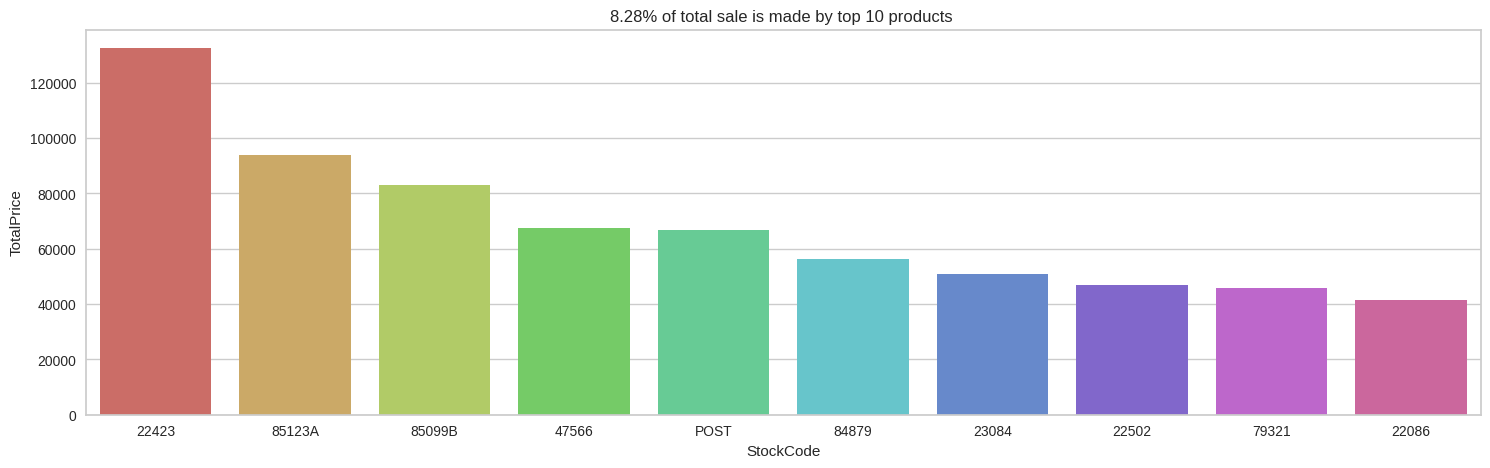

In [52]:
# Total sale by each product
sale_df = df.groupby(['StockCode'])['TotalPrice'].sum().reset_index().sort_values('TotalPrice', ascending=False).reset_index(drop=True)

# percenatge of top 10 product with highest sale
percentage_of_top_10 = round(sale_df['TotalPrice'].head(10).sum() / sale_df['TotalPrice'].sum() * 100, 2)

# ploting bar chart for top 10 products with highest sale
plt.figure(figsize=(18,5))
plt.title(f'{percentage_of_top_10}% of total sale is made by top 10 products ', fontdict={'size': 12})
sns.barplot(x='StockCode',y='TotalPrice',data=sale_df.head(10),palette="hls")

#### Chart - 6 Products with sale value less than $100.

In [53]:
# products with sale value less than 100 dollar
lowest_count = (sale_df[(sale_df['TotalPrice'] < 100)].shape)[0]
print(f'products having sale value less than 100 dollar is {lowest_count}')

products having sale value less than 100 dollar is 847


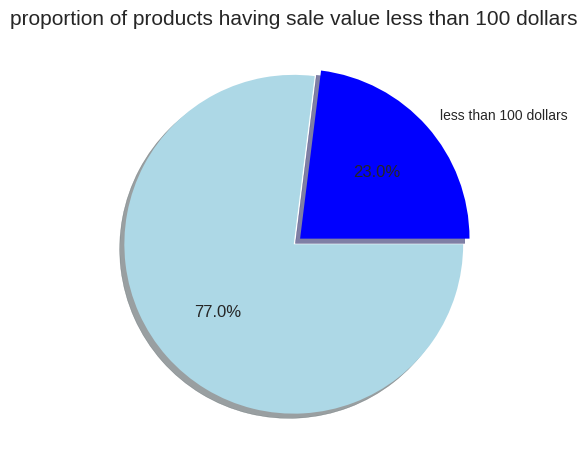

In [54]:
# ploting pie chart to show percentage of products having sale value less than 100 dollars.
plt.title('proportion of products having sale value less than 100 dollars', fontsize = 15)
plt.pie([848, (df['StockCode'].nunique() - 848)], autopct = '%1.1f%%', labels = ['less than 100 dollars', ''], explode = [0.05,0], shadow = True, colors = ['blue','lightblue'])
plt.show()

There are 23% products having sale value less than 100 dollars.

##### 1. Why did you pick the specific chart?

* Since the aforementioned goods are the ones that are most commonly bought, businesses ought to always keep some on hand. This will enhance availability and improve their financial situation.

More than 400 of the least popular products have less than 5 total transactions; keeping them in stock wastes space and could be detrimental to the business. 




##### 2. What is/are the insight(s) found from the chart?

* The top 10 goods with the highest sale value are '22423', '85123A',   '85099B', '47566', 'POST', '84879', '23084', '22502', '79321', and '22086'.
* Stockcode 22423 has the highest sale value of more over 130k dollars. 
* The top 10 products account for 8.28% of the total sales.
* The second-highest sale value, more than $90k, belongs to Stockcode 85123A.
* 23% of products have a retail value of under $100.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Including bad sales, there are about 200 products with sale values under $10. If we keep these products without additional investigation into their value, our business will not develop.


#### Chart - 7 Generate word cloud for 'Description'.

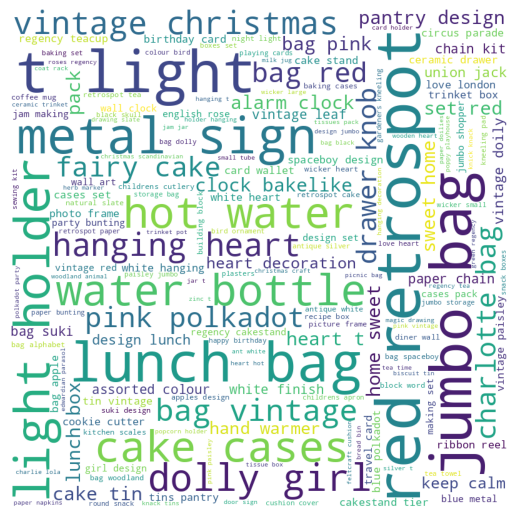

In [55]:
# Python program to generate WordCloud
 
# importing wordcloud modules
from wordcloud import WordCloud, STOPWORDS
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.Description:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (18, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

##### 1. Why did you pick the specific chart?

The magnitude of each word in a word cloud, a graphical representation of textual data, shows its frequency or significance. Word clouds help you rapidly discover the most prevalent or significant words in a document or dataset, which makes them ideal for visualising text data.




##### 2. What is/are the insight(s) found from the chart?

* Products like light holders, water bottles, hanging hearts, lunch bags, dolls, red retrospots, metal signs, Christmas, and giant bags are among the frequently ordered items. 



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* Keeping extra stockpiles of goods related to the words that are frequently used and are displayed in the word cloud above would be beneficial for business.


#### Unique customer count

In [56]:
# Unique customer count
customer_count = df['CustomerID'].nunique()
print(f'Total customer count is {customer_count}')

Total customer count is 4370


#### Chart - 8 Top 10 customers with highest transaction count and their total purchase value.

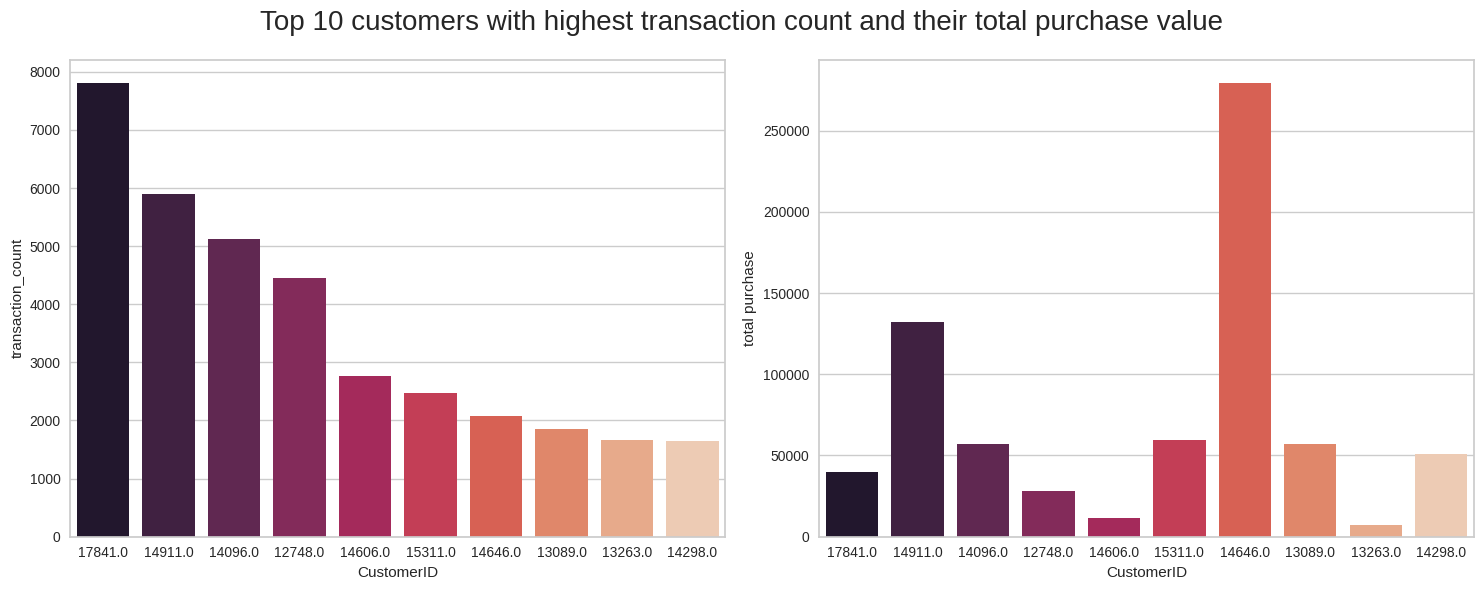

In [57]:
# transaction count for each customer
t_count = df.groupby(['CustomerID']).agg({'InvoiceNo' : 'count', 'TotalPrice' : 'sum'}).rename(columns = {'InvoiceNo' : 'transaction_count'}).sort_values(['transaction_count'], ascending=False).reset_index()

# defining figure size
fig = plt.figure(figsize=(15,6))
fig.suptitle('Top 10 customers with highest transaction count and their total purchase value', fontsize= 20)

# ploting bar chart for Top 10 customers with highest transaction count
plt.subplot(1, 2, 1)
sns.barplot(x='CustomerID',y='transaction_count',data=t_count.head(10), order=t_count['CustomerID'].head(10),palette="rocket")

# ploting total purchase value'
plt.subplot(1, 2, 2)
sns.barplot(x='CustomerID',y='TotalPrice',data=t_count.head(10), order=t_count['CustomerID'].head(10),palette="rocket")
plt.ylabel('total purchase')
plt.tight_layout()

#### Chart - 9 Customers having low transaction count.

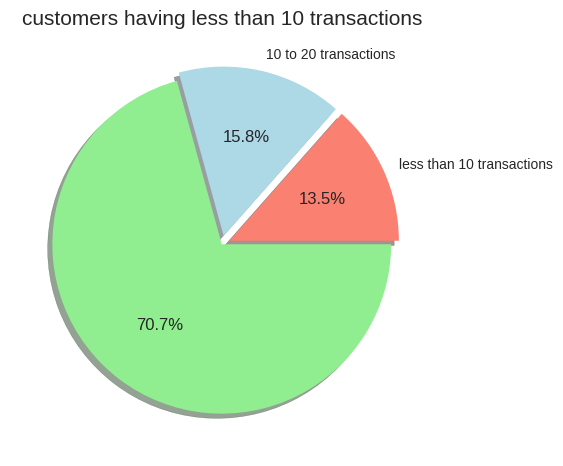

In [58]:
# customer count having less than 10 transactions
lessthan10 = t_count[t_count['transaction_count'] < 10].shape[0]
# customer count having 10 to 20 transactions
between10_20 = t_count[t_count['transaction_count'].isin(range(10,21)) ].shape[0]
# customer count having more than 20 transactions
morethan20 = customer_count - lessthan10 - between10_20

# ploting pie chart to show percentage of customer having less than 10 transaction count
plt.title('customers having less than 10 transactions', fontsize = 15)
plt.pie([lessthan10, between10_20, morethan20], autopct = '%1.1f%%', labels = ['less than 10 transactions', '10 to 20 transactions', ''], explode = [0.05,0.05, 0], shadow = True, colors = ['salmon','lightblue', 'lightgreen'])
plt.show()

##### 1. Why did you pick the specific chart?

Pie chart is good for comparing variables.

##### 2. What is/are the insight(s) found from the chart?

There are 4370 total customers, with the most transactions coming from '17841'. '14911' and '14096' have a combined total of more than 5000 transactions.
* "14646" is among the top 10 customers by highest transaction volume and has the highest aggregate buy value of more than $250k despite having only 2085 transactions. 13.5% of consumers have fewer than ten transactions, while 15.8% have between ten and twenty.

#### Unique Invoice count

In [59]:
# Unique 'InvoiceNo' count
invoice_count = df['InvoiceNo'].nunique()
print(f'Total Invoice count is {invoice_count}')

Total Invoice count is 22184


#### Chart - 10 Top most and least frequent customers according to total Invoice count.

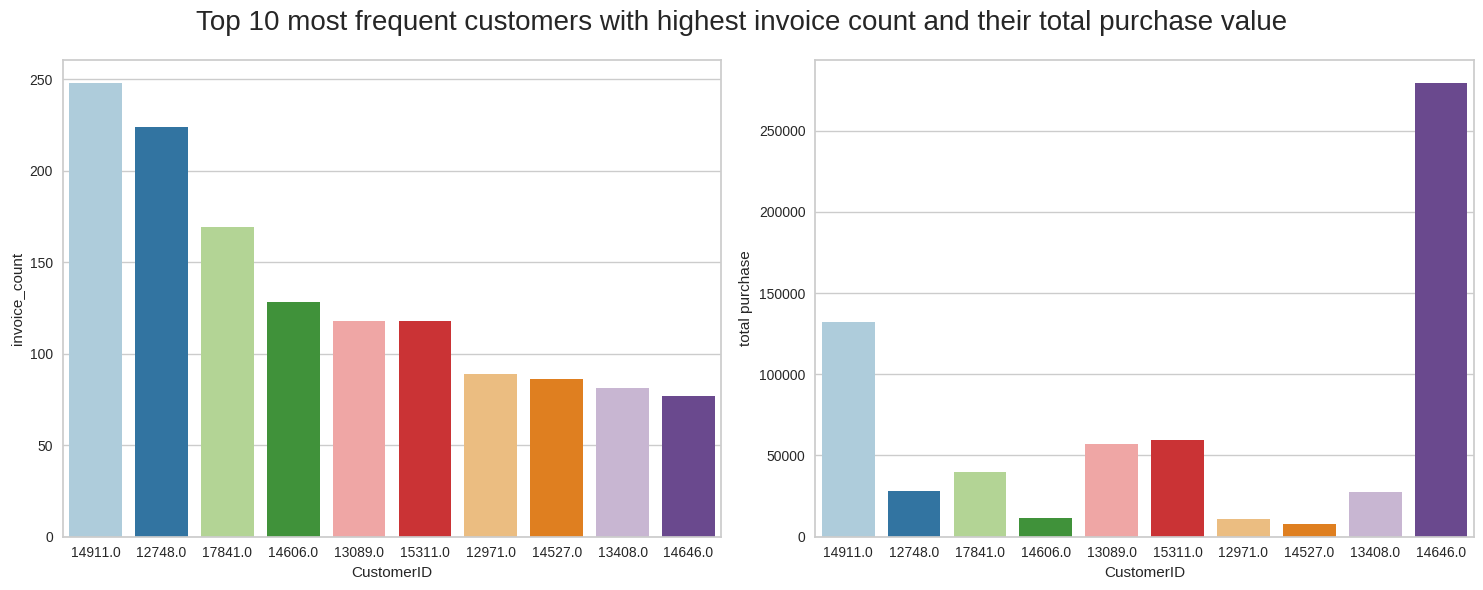

In [60]:
# invoice count of each customers with total purchase value
customer_invoice_df = df.groupby(['CustomerID']).agg({'InvoiceNo' : 'nunique', 'TotalPrice' : 'sum'}).rename(columns = {'InvoiceNo' : 'invoice_count'}).sort_values(['invoice_count'], ascending=False).reset_index()

# defining figure size
fig = plt.figure(figsize=(15,6))
fig.suptitle('Top 10 most frequent customers with highest invoice count and their total purchase value', fontsize= 20)

# ploting bar chart for Top 10 most frequent customers with highest invoice count
plt.subplot(1, 2, 1)
sns.barplot(x='CustomerID',y='invoice_count',data=customer_invoice_df.head(10), order=customer_invoice_df['CustomerID'].head(10),palette="Paired")

# ploting total purchase value'
plt.subplot(1, 2, 2)
sns.barplot(x='CustomerID',y='TotalPrice',data=customer_invoice_df.head(10), order=customer_invoice_df['CustomerID'].head(10),palette="Paired")
plt.ylabel('total purchase')
plt.tight_layout()

#### Chart - 11 Least frequent consumers.

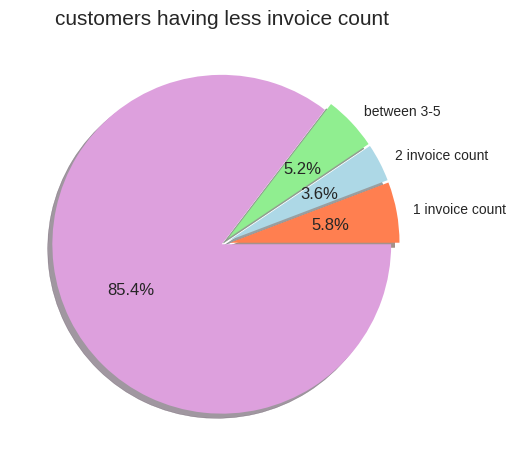

In [61]:
# customer count having only 1 invoice count 
f_1 = customer_invoice_df[(customer_invoice_df['invoice_count'] == 1) & (customer_invoice_df['TotalPrice'] > 0)].shape[0]
# customer count having only 2 invoice count 
f_2 = customer_invoice_df[(customer_invoice_df['invoice_count'] == 2) & (customer_invoice_df['TotalPrice'] > 0)].shape[0]
# customer count having 3 to 5 invoice count  
f_3_5 = customer_invoice_df[(customer_invoice_df['invoice_count'].isin(range(3,6))) & (customer_invoice_df['TotalPrice'] > 0)].shape[0]
# customer count having more than 5 invoice count 
morethan5 = invoice_count - f_1 - f_2 - f_3_5

# ploting pie chart to show percentage of customer having less invoice count
plt.title('customers having less invoice count', fontsize = 15)
plt.pie([f_1, f_2, f_3_5, morethan5], autopct = '%1.1f%%', labels = ['1 invoice count', '2 invoice count', 'between 3-5', ''], explode = [0.05,0.05, 0.05, 0], shadow = True, colors = ['coral','lightblue', 'lightgreen', 'plum'])
plt.show()

##### 1. Why did you pick the specific chart?

Pie chart is best for comparing each and every variables.

##### 2. What is/are the insight(s) found from the chart?

According to invoice count, the top 10 most frequent customers are 14911, 12748, 17841, 14606, 13089, 15311, 12971, 14527, 13408 and 14646. There are 22184 invoices in all.
5.8% of the customers have only made one purchase, 3.6% have only received two invoices, 5.2% have received three to five, and '14646' has the highest total purchase value of all the customers.

#### Chart - 12 Top 10 customers with highest total purchase value.

<Axes: title={'center': '16.53% of total sale is made by top 10 customers '}, xlabel='CustomerID', ylabel='TotalPrice'>

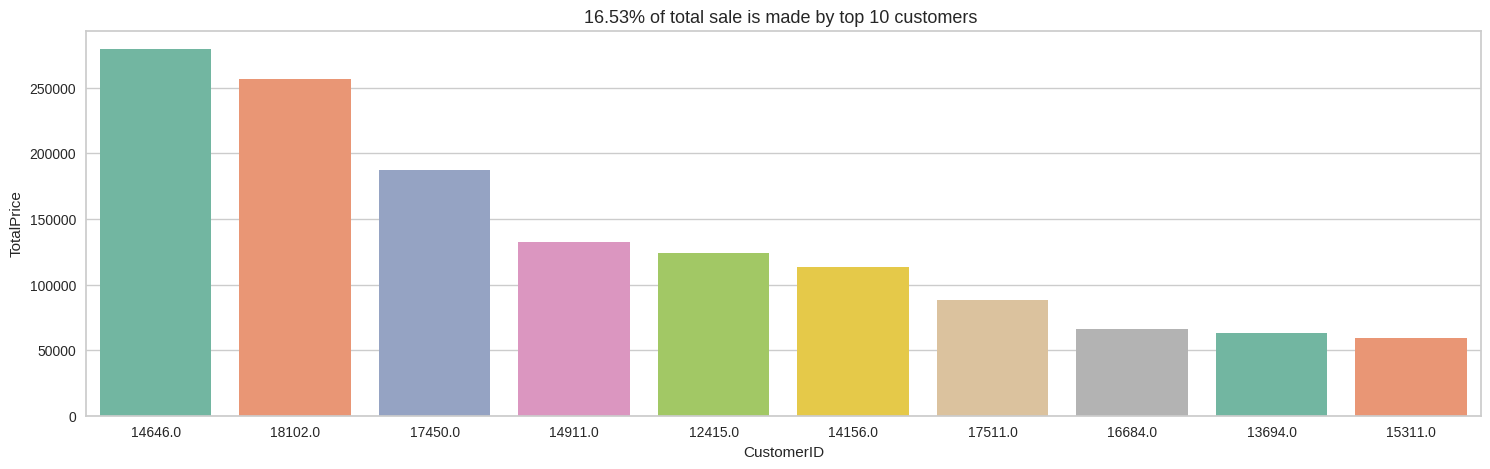

In [62]:
# Total purchase by each customer
customer_sale_df = df.groupby(['CustomerID'])['TotalPrice'].sum().reset_index().sort_values('TotalPrice', ascending=False).reset_index(drop=True)

# percenatge of top 10 customers with highest total purchase.
percentage_of_top_10 = round(customer_sale_df['TotalPrice'].head(10).sum() / customer_sale_df['TotalPrice'].sum() * 100, 2)

# ploting bar chart for top 10 customers with highest total purchase.
plt.figure(figsize=(18,5))
plt.title(f'{percentage_of_top_10}% of total sale is made by top 10 customers ', fontdict={'size': 13})
sns.barplot(x='CustomerID',y='TotalPrice',data=customer_sale_df.head(10), order = customer_sale_df['CustomerID'].head(10),palette="Set2")

#### Chart - 13 Customer with total purchase less than $100.

In [63]:
# customer with total purchase less than 100 dollar
less_count = (customer_sale_df[(customer_sale_df['TotalPrice'] < 100)].shape)[0]
print(f'customer count with total purchase less than 100 dollar is {less_count}')

customer count with total purchase less than 100 dollar is 216


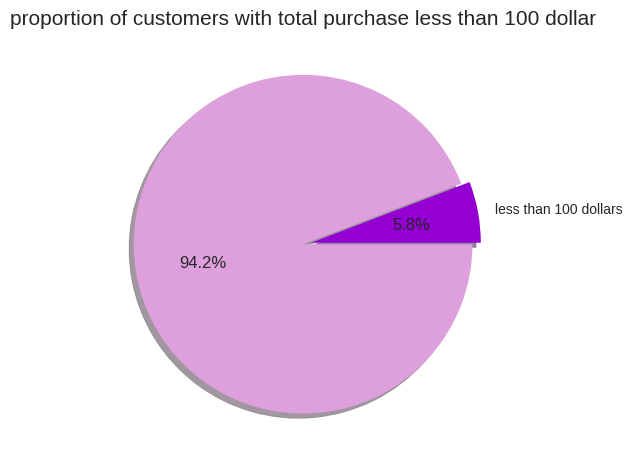

In [64]:
# ploting pie chart to show percentage of products having sale value less than 100 dollars.
plt.title('proportion of customers with total purchase less than 100 dollar', fontsize = 15)
plt.pie([218, (df['CustomerID'].nunique() - 848)], autopct = '%1.1f%%', labels = ['less than 100 dollars', ''], explode = [0.05,0], shadow = True, colors = ['darkviolet','plum'])
plt.show()

##### 1. Why did you pick the specific chart?

Pie chart is good for visualising two variables in form of comparision.

##### 2. What is/are the insight(s) found from the chart?

'14646', '18102', '17450', '14911', '12415', '14156', '17511', '16684', '13694', and '15311' are the top 10 consumers with the greatest purchase value.
* "14646" and "18102" are two customers who have made purchases totaling more than $250,000.
* 5.8% of consumers make purchases worth less than $100.

#### Chart - 14 - Histogram for total purchase per customer.

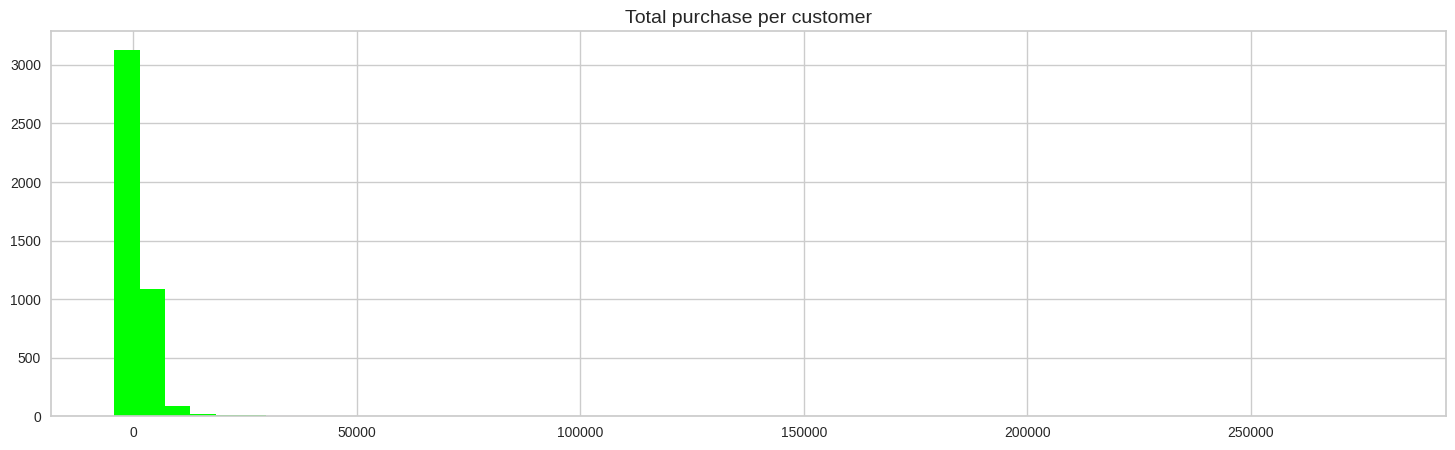

In [65]:
# defining figure size
fig = plt.figure(figsize=(18,5))

# ploting Histogram for TotalPrice
plt.hist(customer_sale_df['TotalPrice'], bins = 50, color='lime')
plt.title('Total purchase per customer', fontsize = 14)
plt.show()

In [66]:
customer_sale_df['TotalPrice'].describe()

count      4370.000000
mean       1894.462294
std        8220.724284
min       -4287.630000
25%         292.002500
50%         644.270000
75%        1609.545000
max      279489.020000
Name: TotalPrice, dtype: float64

In [67]:
# quantile values
customer_sale_df['TotalPrice'].quantile([0.9, 0.99])

0.90     3497.6580
0.99    17236.4911
Name: TotalPrice, dtype: float64

##### 1. Why did you pick the specific chart?

A histogram is an effective tool for data visualisation and analysis. You can use it to find the central tendency, comprehend the distribution of the data, draw conclusions, and contrast distributions.

##### 2. What is/are the insight(s) found from the chart?

90% of customers have total purchases valued at less than $3,500, 99% have total purchases valued at less than $17,000, and only 1% of customers have total purchases valued at more than $17,000.

#### Chart - 15 - Correlation Heatmap

<Axes: >

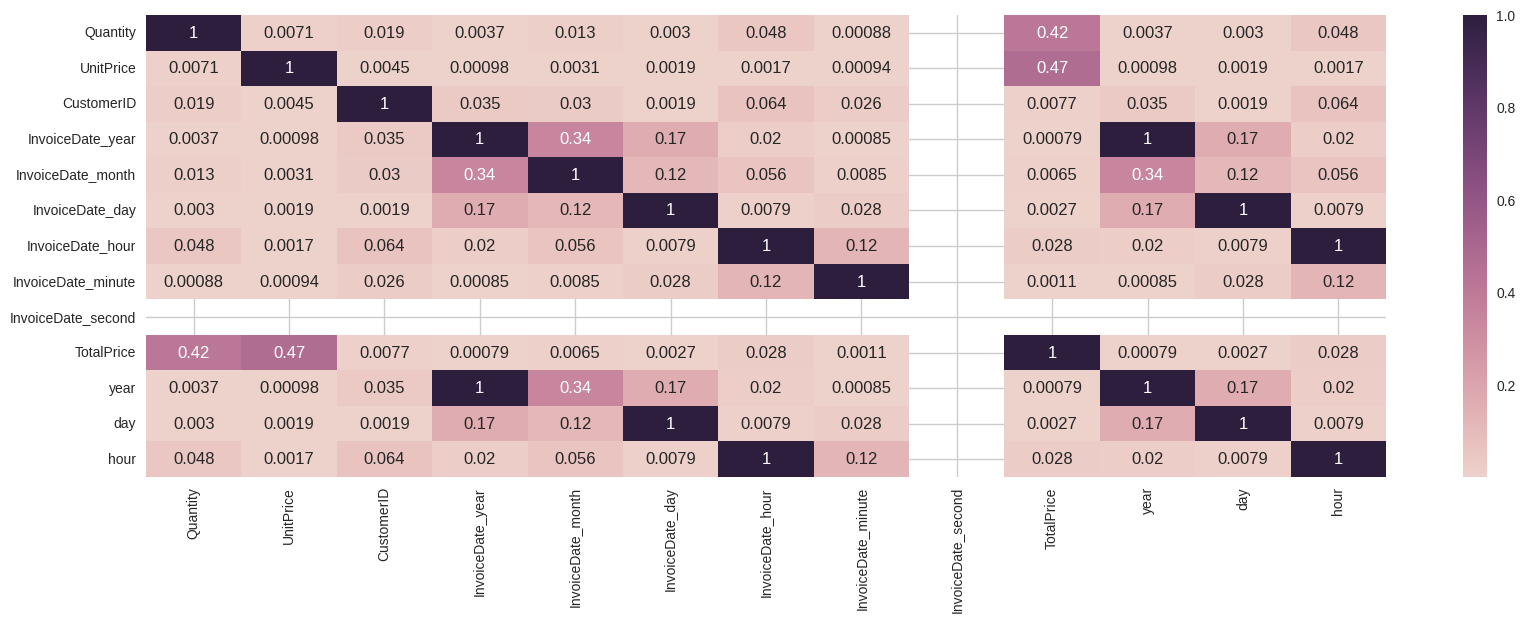

In [68]:
corr = df.corr(numeric_only = True)
plt.figure(figsize = (20,6))
sns.heatmap(abs(corr),annot = True,cmap =sns.cubehelix_palette(as_cmap=True))

##### 1. Why did you pick the specific chart?

As we want to check the correlation among all the given variables so correlation heatmap is a best chart to represent this data.

##### 2. What is/are the insight(s) found from the chart?

We get the information that all the variables are not so much correlated to each other.

### Let's Talk About Geographical Analysis.

#### Unique country count

In [69]:
# Unique customer count
customer_count = df['Country'].nunique()
print(f'Total country count is {customer_count}')

Total country count is 37


#### order percentage per country.

In [70]:
# order count by country
country_count = df[~df['InvoiceNo'].str.contains('C')].groupby(['Country'])['Country'].count().reset_index(name='order_count').sort_values(['order_count'], ascending=False)
# calculating order percentage of each country
country_count['order_percent'] = country_count['order_count'] / country_count['order_count'].sum() * 100

# cancel order count by country
country_cancel_count = df[df['InvoiceNo'].str.contains('C')].groupby(['Country'])['Country'].count().reset_index(name='cancel_count')
country_count = country_count.merge(country_cancel_count, on = 'Country')

# calculate cancelled order percent
country_count['cancel_percent'] = country_count['cancel_count'] / country_count['order_count'] * 100



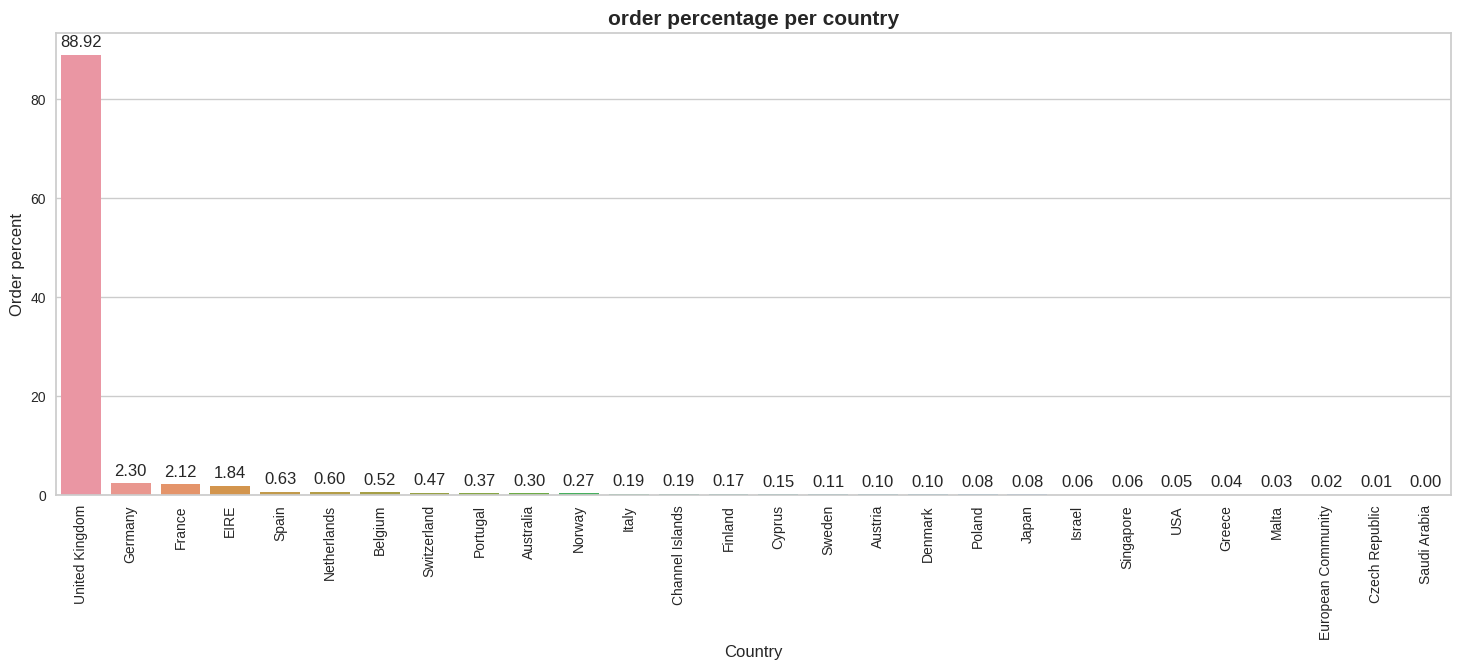

In [71]:
# Figure Size
plt.figure(figsize = (18,6))

# ploting bar chart to visualize order percentage per country.
splot = sns.barplot(x='Country', y='order_percent', data = country_count)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('order percentage per country',weight='bold', size=15)
plt.ylabel('Order percent', size=12, )
plt.xlabel('Country', size=12,)
plt.xticks(rotation=90)
plt.show()

#### Percent order cancelled by each country

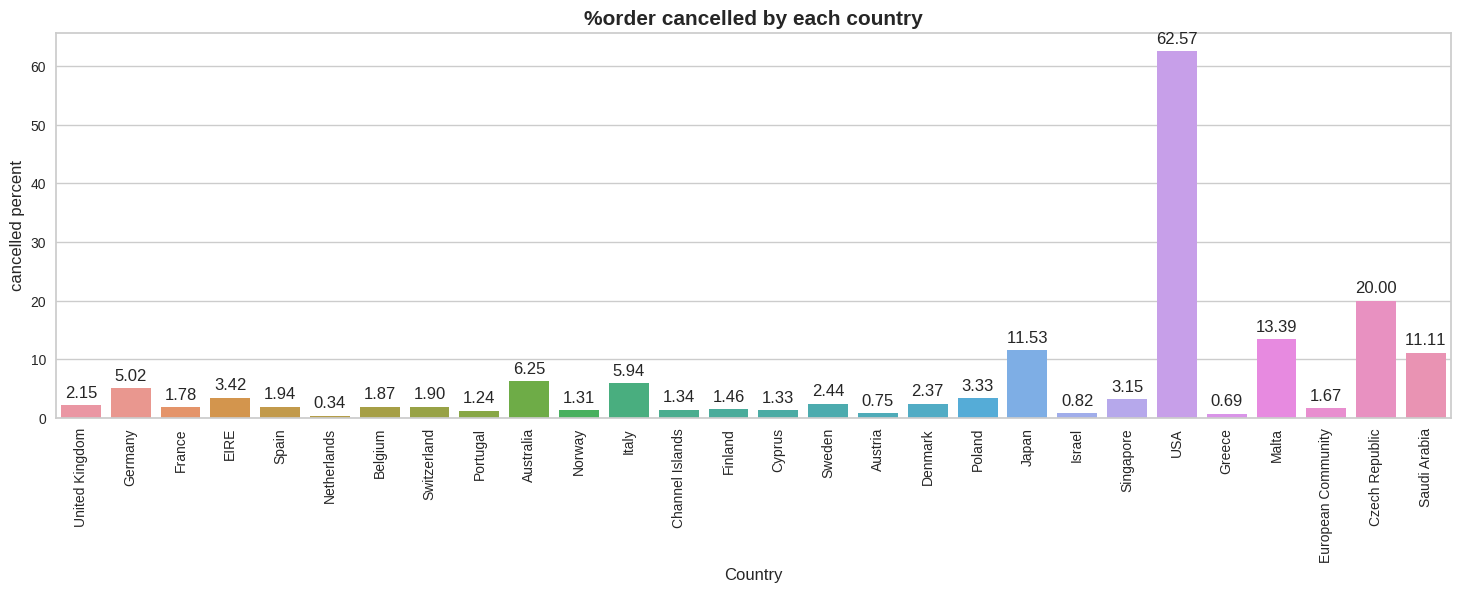

In [72]:
# Figure Size
plt.figure(figsize = (18,5))

# ploting bar chart to visualize percenatge of cancelled order by each country
splot = sns.barplot(x='Country', y='cancel_percent', data = country_count)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('%order cancelled by each country',weight='bold', size=15)
plt.ylabel('cancelled percent', size=12, )
plt.xlabel('Country', size=12,)
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

A Bargraph is an effective tool for data visualisation and analysis. You can use it to find distribution of the data, draw conclusions, and contrast distributions.

##### 2. What is/are the insight(s) found from the chart?

* There are 37 countries in all.
* Only orders from the United Kingdom account for 89% of all orders. Saudi Arabia and the Czech Republic have the fewest orders.
* USA and Czech Republic have the greatest percentages of cancelled orders (62% and 20%, respectively), meaning that 62% of all orders have been cancelled.


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The USA has a 62% cancellation rate, which might be quite expensive if an order is cancelled after it has been shipped. As a result, we need to analyse orders from nations with high cancellation rates. Otherwise, there will be a decline in corporate growth.


#### Customer count per Country.

In [73]:
# customer count per country
customer_countdf = df.groupby(['Country']).agg(customer_count = ('CustomerID' , 'nunique'), total_sale = ('TotalPrice' , 'sum')).reset_index().sort_values(['customer_count'], ascending=False)

# calculating sale percentage of each country
customer_countdf['sale_percent'] = customer_countdf['total_sale'] / customer_countdf['total_sale'].sum() * 100


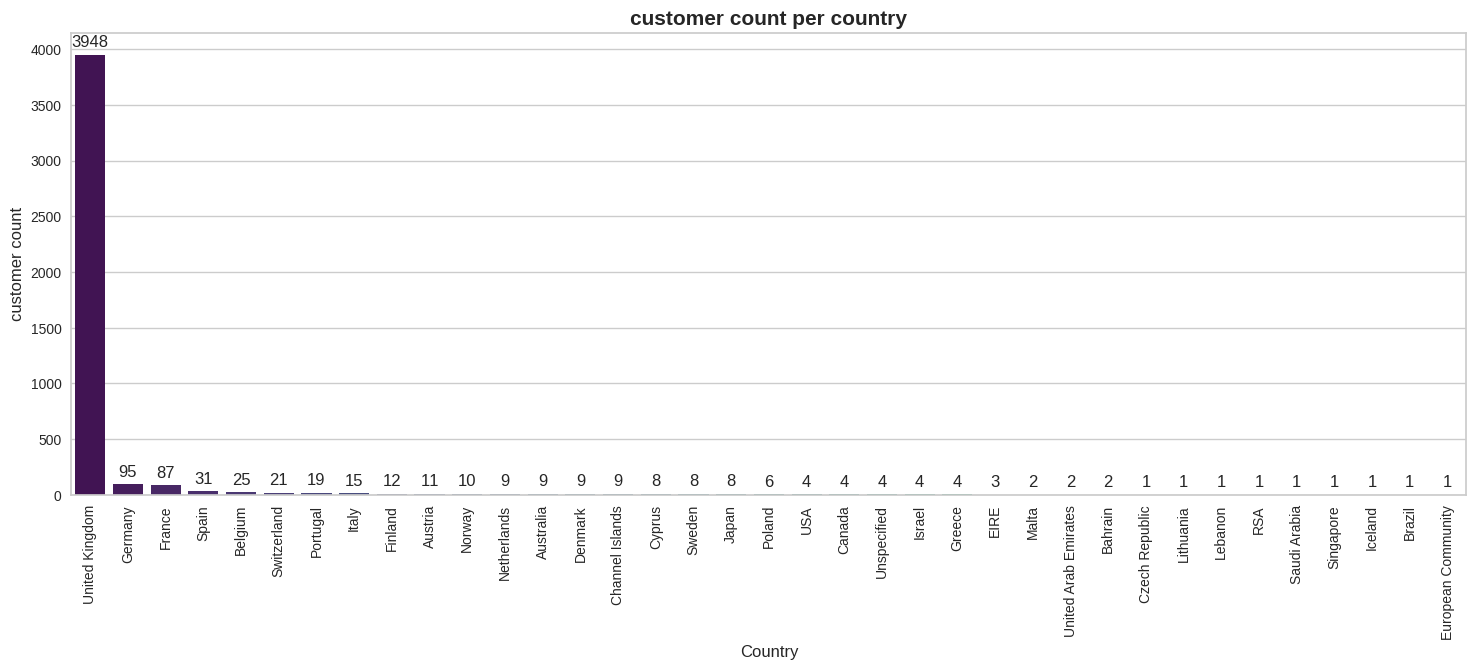

In [74]:
# Figure Size
plt.figure(figsize = (18,6))

# ploting bar chart to visualize customer count per country.
splot = sns.barplot(x='Country', y='customer_count', data = customer_countdf,palette="viridis")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('customer count per country',weight='bold', size=15)
plt.ylabel('customer count', size=12, )
plt.xlabel('Country', size=12,)
plt.xticks(rotation=90)
plt.show()

#### Sales percentage by each country.

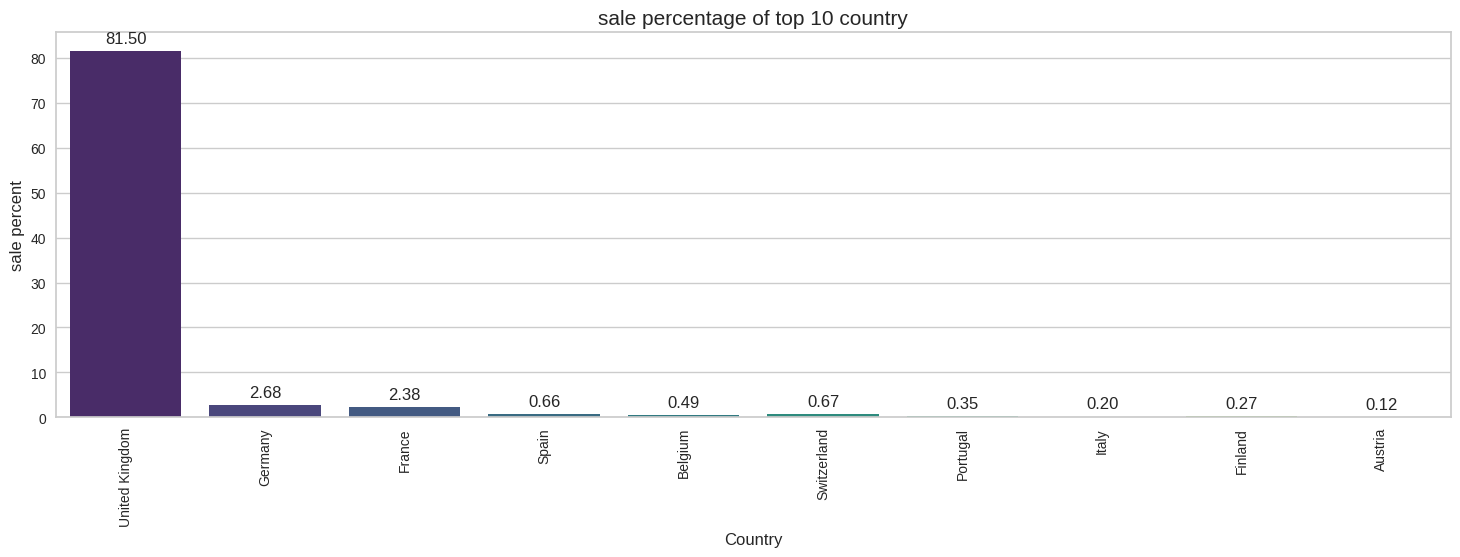

In [75]:
# Figure Size
plt.figure(figsize = (18,5))

# ploting bar chart to visualize total sale percentage by top 10 country
splot = sns.barplot(x='Country', y='sale_percent', data = customer_countdf.head(10),palette="viridis")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('sale percentage of top 10 country', size=15)
plt.ylabel('sale percent', size=12, )
plt.xlabel('Country', size=12,)
plt.xticks(rotation=90)
plt.show()

### Point of view on DateTime Analysis.

#### Creating DateTime dataframe with daily sale and daily order count.

In [76]:
# geting transacation count and total sale per day
DateTime_df = df.groupby(['date']).agg(transaction_count = ('date', 'count'), sale = ('TotalPrice', 'sum')).reset_index() 

# coverting dtype to datetime.
DateTime_df['date'] = pd.to_datetime(DateTime_df['date'])

# extracting 'year' from 'Date'
DateTime_df['year'] = DateTime_df['date'].dt.year

# extracting 'month' from 'Date'
DateTime_df['month'] = DateTime_df['date'].dt.strftime('%b')

# extracting 'day' from 'Date'
DateTime_df['day'] = DateTime_df['date'].dt.day

# extracting 'weekday' from 'Date'
DateTime_df['weekday'] = DateTime_df['date'].dt.day_name()


#### Transaction Count And Sale Trend over period of 1 year on daily basis.

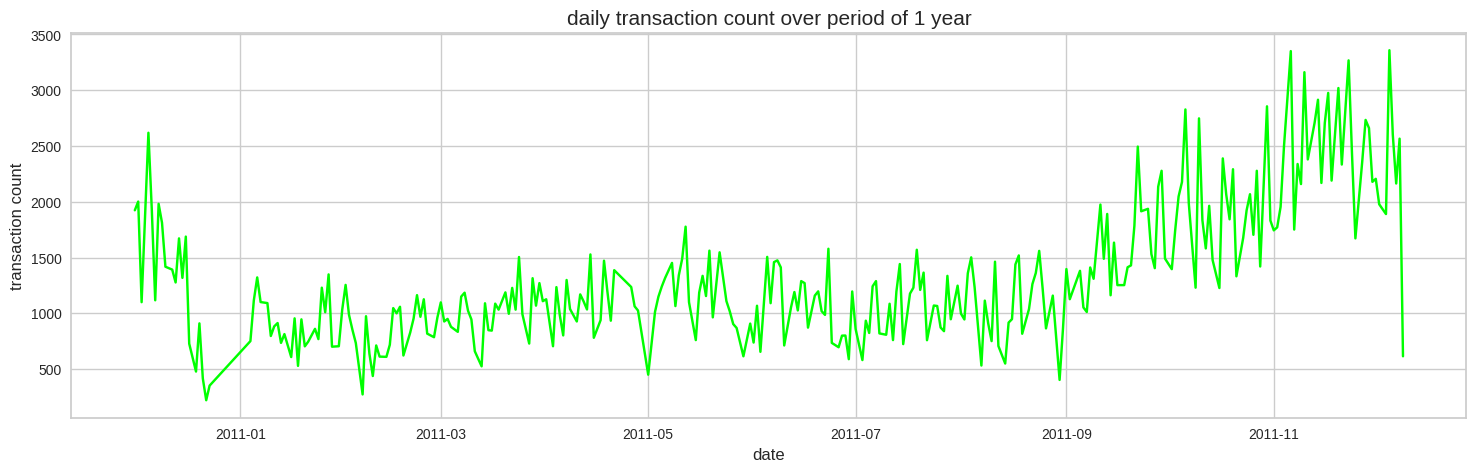

In [77]:
# Figure Size
plt.figure(figsize = (18,5))
# ploting transaction count over period of 1 year on daily basis.
plt.plot(DateTime_df['date'], DateTime_df['transaction_count'],color='lime')
plt.title('daily transaction count over period of 1 year', size=15)
plt.ylabel('transaction count', size=12, )
plt.xlabel('date', size=12,)
plt.show()

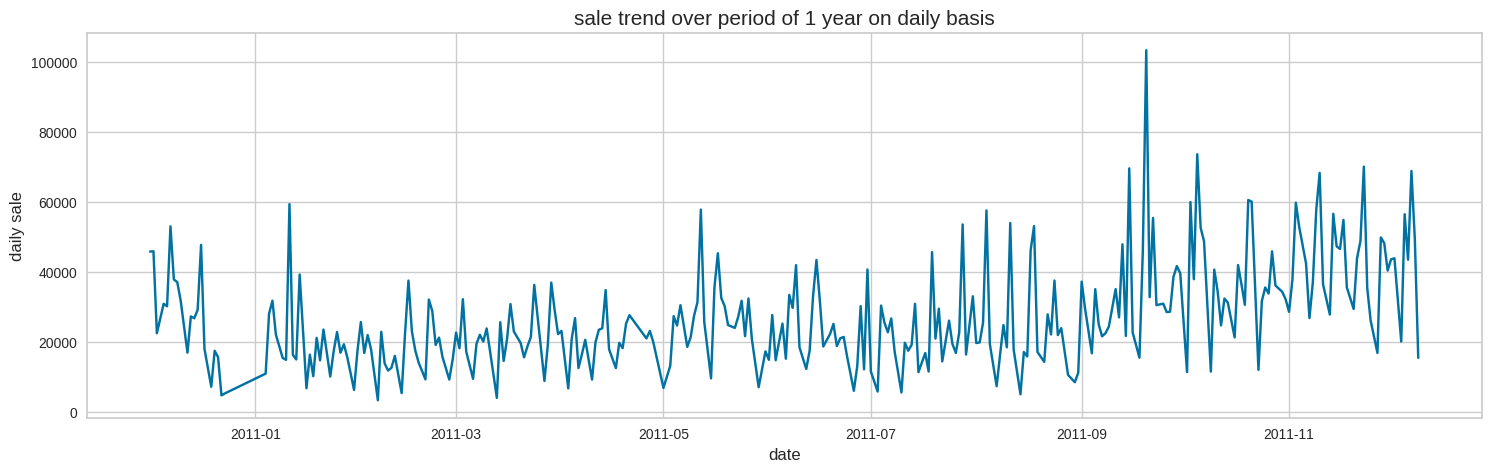

In [78]:
# Figure Size
plt.figure(figsize = (18,5))
# ploting sale trend over period of 1 year on daily basis.
plt.plot(DateTime_df['date'], DateTime_df['sale'])
plt.title('sale trend over period of 1 year on daily basis', size=15)
plt.ylabel('daily sale', size=12, )
plt.xlabel('date', size=12,)
plt.show()

#### Monthly sale and transaction count.

In [79]:
# monthly sale and transactions count
monthly_df = DateTime_df.groupby('month').agg(transaction_count = ('transaction_count', 'sum'), sale = ('sale', 'sum')).reset_index() 

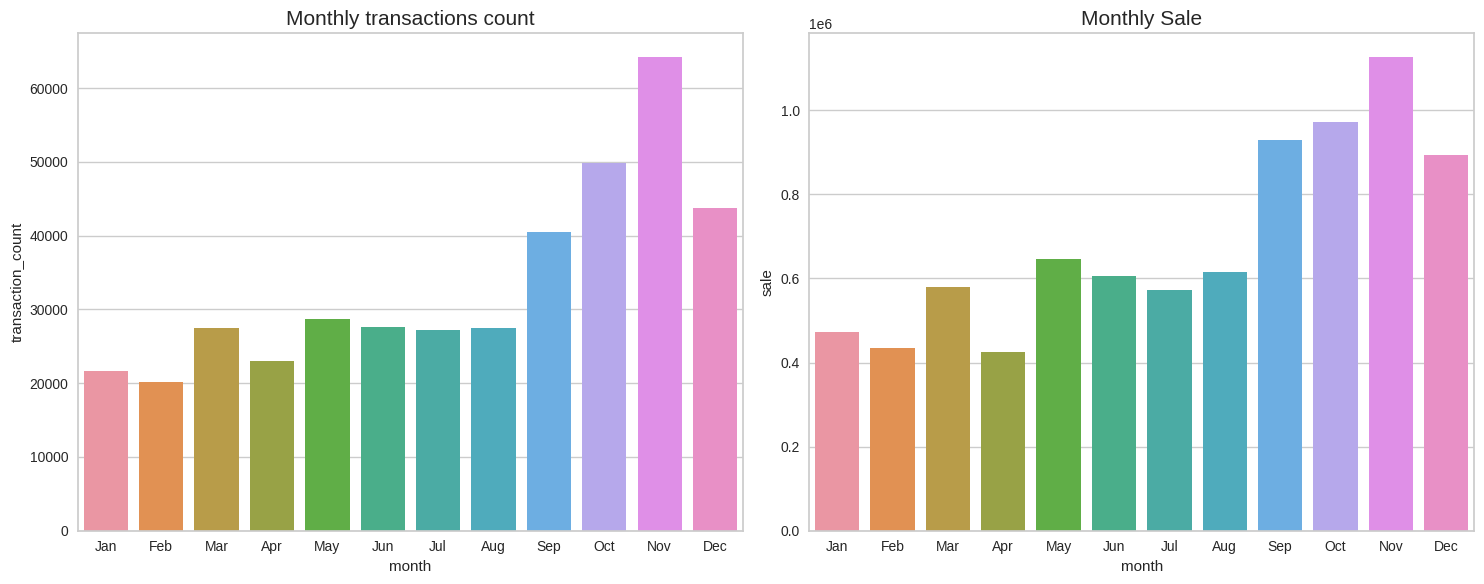

In [80]:
# defining figure size
fig = plt.figure(figsize=(15,6))

# ploting bar chart for visualizing monthly transactions count
plt.subplot(1, 2, 1)
order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.barplot(x='month',y='transaction_count',data=monthly_df, order=order)
plt.title('Monthly transactions count', fontsize = 15)

# ploting bar chart for visualizing monthly sale
plt.subplot(1, 2, 2)
sns.barplot(x='month',y='sale',data=monthly_df, order=order)
plt.title('Monthly Sale', fontsize = 15)
plt.tight_layout()

#### Monthly average sale trend.

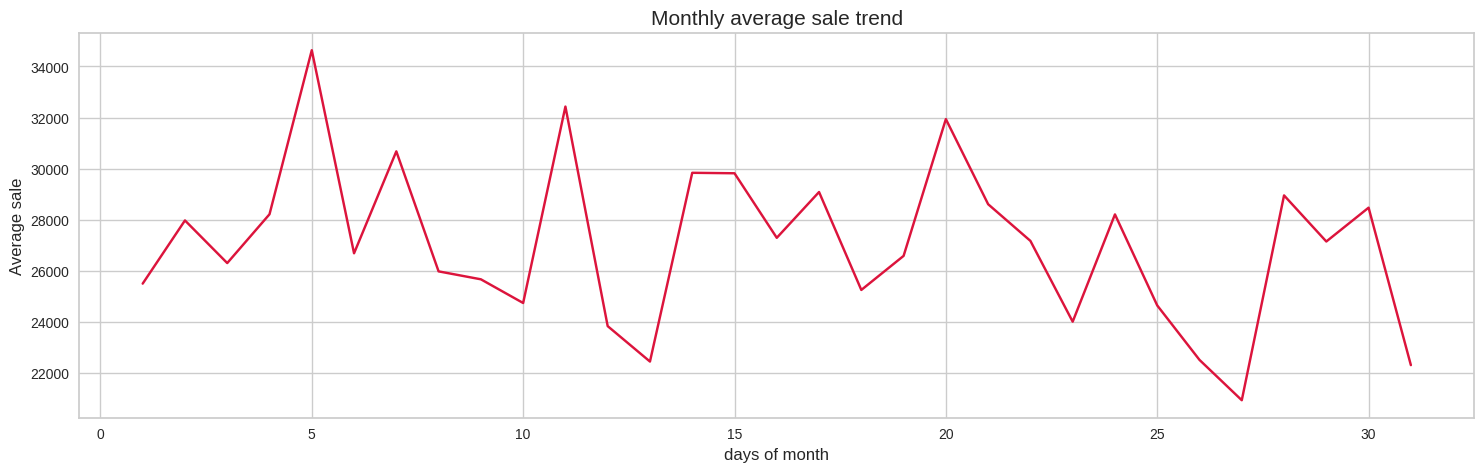

In [81]:
# 30 days average sale
thirtydays_df = DateTime_df.groupby('day').agg(sale = ('sale', 'mean')).reset_index() 

# Figure Size
plt.figure(figsize = (18,5))
# ploting Monthly average sale trend.
plt.plot(thirtydays_df['day'], thirtydays_df['sale'],color='crimson')
plt.title('Monthly average sale trend', size=15)
plt.ylabel('Average sale', size=12, )
plt.xlabel('days of month', size=12,)
plt.show()

#### Weekly average sale trends.

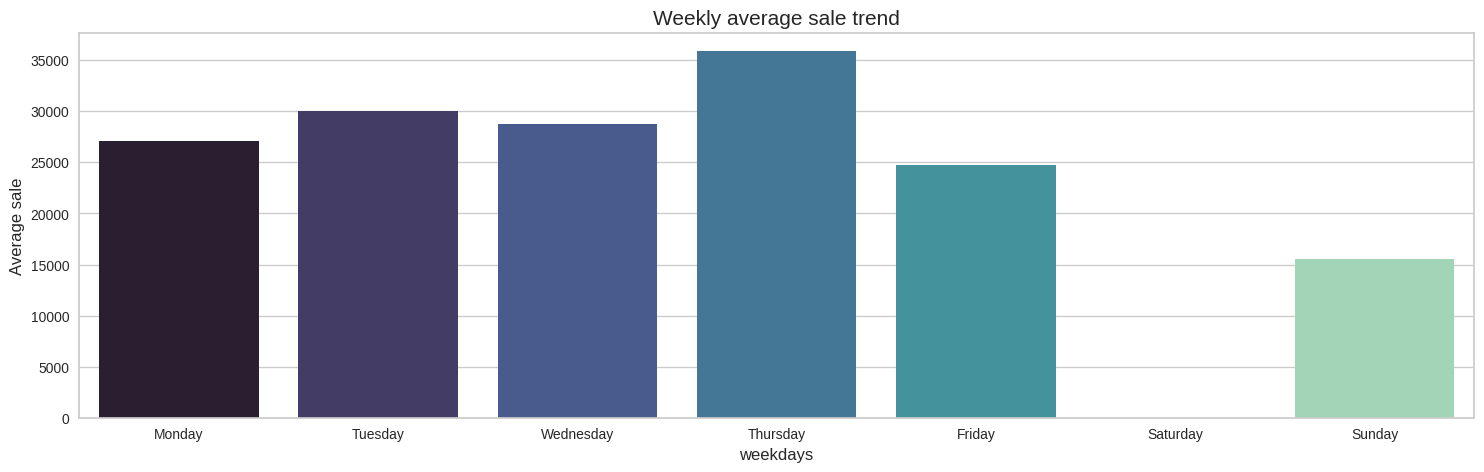

In [82]:
# weekdays average sale
weekly_df = DateTime_df.groupby('weekday').agg(sale = ('sale', 'mean')).reset_index()

# Figure Size
plt.figure(figsize = (18,5))
# ploting Weekly average sale trend.
order =  ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x='weekday',y='sale',data=weekly_df, order=order,palette="mako")
plt.title('Weekly average sale trend', size=15)
plt.ylabel('Average sale', size=12, )
plt.xlabel('weekdays', size=12,)
plt.show()

#### Average Invoice count at each hour.

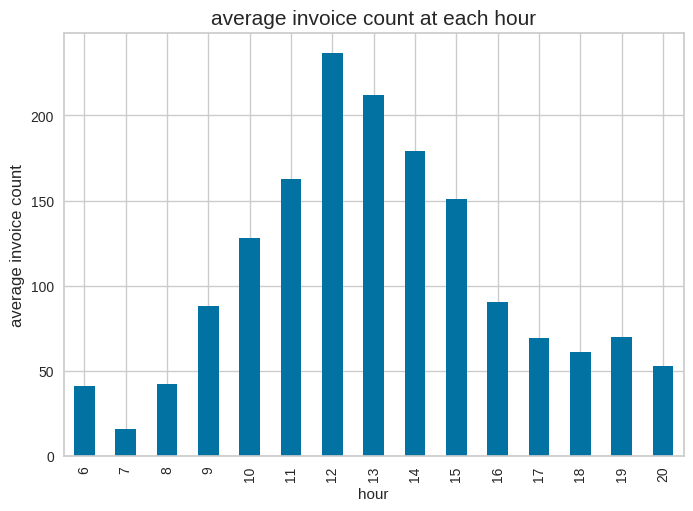

In [83]:
# ploting average Invoice count at each hour.
df.groupby(['date', 'hour']).agg(invoice_count = ('InvoiceNo', 'count')).reset_index().groupby('hour')['invoice_count'].mean().plot.bar()
plt.title('average invoice count at each hour', fontsize = 15)
plt.ylabel('average invoice count', fontsize = 12)
plt.show()

**Insights from DateTime analysis :** 
Most invoices are generated between 9am and 5pm.
  * High number of daily transactions in the last quarter, possibly due to holidays like Halloween and Christmas Eve.
  * Daily sale is also high in the second half of the year compared to the first. 
  * Highest sale in November. 
  * Sale is high in the last four months compared to other months. 
  * Closed on Saturday, don't get any orders on Saturday. 
  * Average sale on Sunday is low compared to other weekdays.


## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. The daily average selling exceeds $27,000.
2. More than 1300 transactions occur on average each day.
3. The average sale per client in Germany is the same as the average sale per customer in France.


### Hypothetical Statement - 1

#### **Daily average sale is more than 27000 dollars.**









#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis H0 : μ ≤ 27000

Alternate hypothesis H1 : μ > 27000

Test type : Right Tailed test

singificance level = 0.05

#### 2. Perform an appropriate statistical test.

In [84]:
# Perform Statistical Test to obtain P-Value

# sales per customer
daily_sales = df.groupby(['date'])['TotalPrice'].sum().tolist()
# selecting 50 random data points from daily sales list
sample = random.sample(daily_sales, 50)

mean = 27000
sample_mean = np.mean(sample)                     # sample mean
sample_size = len(sample)                         # sample size
std = np.std(sample)                              # standard deviation

# calculating z-value
z = (sample_mean - mean) / (std/np.sqrt(sample_size))

# calculate p-value
p_value = norm.cdf(z)
# Substract from 1 beacause it is a Right tailed test
p_value = 1 - p_value

# conclusion
significance_level = 0.05
if p_value>significance_level:
  print(f"Failed to reject the null hypothesis for p-value = {p_value}")
else:
  print(f"Null hypothesis rejected Successfully for p-value = {p_value}")

Failed to reject the null hypothesis for p-value = 0.11625143319286191


##### Which statistical test have you done to obtain P-Value?

I conducted the z-test statistical test to determine the P-Value and discovered that, at the 5% level of significance, there is insufficient data to support the alternative hypothesis that the daily average sale is greater than $27,000.


### Hypothetical Statement - 2
#### **Daily average transactions count is more than 1300.**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis H0 : μ ≤ 1300

Alternate hypothesis H1 : μ > 1300

Test type : Right Tailed test

singificance level = 0.05

#### 2. Perform an appropriate statistical test.

In [85]:
# Perform Statistical Test to obtain P-Value

# daily transactions count
daily_tcount = df.groupby(['date'])['InvoiceNo'].count().tolist()
# selecting 50 random data points from daily transactions count
sample = random.sample(daily_tcount, 50)

mean = 1300
sample_mean = np.mean(sample)                     # sample mean
sample_size = len(sample)                         # sample size
std = np.std(sample)                              # standard deviation

# calculating z-value
z = (sample_mean - mean) / (std/np.sqrt(sample_size))

# calculate p-value
p_value = norm.cdf(z)
# Substract from 1 beacause it is a Right tailed test
p_value = 1 - p_value

# conclusion
significance_level = 0.05
if p_value>significance_level:
  print(f"Failed to reject the null hypothesis for p-value = {p_value}")
else:
  print(f"Null hypothesis rejected Successfully for p-value = {p_value}")

Failed to reject the null hypothesis for p-value = 0.0814855360236133


##### Which statistical test have you done to obtain P-Value?

I conducted the z-test statistical test to get the P-Value and discovered that, at the 5% level of significance, there is insufficient data to support the alternative hypothesis that the daily average transaction count exceeds 1300.


### Hypothetical Statement - 3
#### **Germany's average sale per customer is equal to France's average sale per customer.**

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis H0 : μ1 = μ2            

Alternate hypothesis H1 : μ1 ≠ μ2

μ1 = Germany's average sale per customer,  μ2 = France's average sale per cutomer.

Test type : Two Tailed test

singificance level = 0.05

#### 2. Perform an appropriate statistical test.

In [86]:
# Perform Statistical Test to obtain P-Value

# germany sales data
mean1 = np.mean(df[df['Country'] == 'Germany'].groupby(['CustomerID'])['TotalPrice'].sum())            # sample mean
sample_size1 = df[df['Country'] == 'Germany'].groupby(['CustomerID'])['TotalPrice'].sum().size         # sample size
var1 = np.var(df[df['Country'] == 'Germany'].groupby(['CustomerID'])['TotalPrice'].sum())              # sample variance

# france sales data
mean2 = np.mean(df[df['Country'] == 'France'].groupby(['CustomerID'])['TotalPrice'].sum())            # sample mean
sample_size2 = df[df['Country'] == 'France'].groupby(['CustomerID'])['TotalPrice'].sum().size         # sample size
var2 = np.var(df[df['Country'] == 'France'].groupby(['CustomerID'])['TotalPrice'].sum())              # sample variance


# calculating z-value
z = (mean1 - mean2) / np.sqrt((var1/sample_size1) + (var2/sample_size2))

# calculate p-value
p_value = norm.cdf(z)

# Two tailed test
if p_value < 0.5:
  p_value = p_value * 2         
else:
  p_value = (1 - p_value)*2 

# conclusion
significance_level = 0.05
if p_value>significance_level:
  print(f"Failed to reject the null hypothesis for p-value = {p_value}")
else:
  print(f"Null hypothesis rejected Successfully for p-value = {p_value}")

Failed to reject the null hypothesis for p-value = 0.8854372771389345


##### Which statistical test have you done to obtain P-Value?

I performed the z-test statistical test to produce P values, and at the 5% level of significance, I was unable to reject the null hypothesis that the average sale per client in Germany and France is similar.


##### Why did you choose the specific statistical test?

For all of the aforementioned hypothesis tests, I have chosen the z-test as the statical test; however, when the population standard deviation is unknown, we always choose the t-test. We also know that a smaller sample size is required to do the t-test. But the t-test approximates the z-test when the sample size is larger (more than 30). The Central Limit Theorem is to blame for this. This approximation states that the distribution tends to be normal as sample sizes grow greater and larger.

As a result, I compute the z-value in these situations using the t-statistic formula. And we are using z-tables (the usual normal table) to determine the critical region or p-value.


## ***6. Feature Engineering & Data Pre-processing***

**Create a new features Day from Invoicedate**

In [87]:
df['Day']=df['InvoiceDate'].dt.day_name()

**Create a new features TotalAmount from form product of Quantity and Unitprice**

In [88]:
df['TotalAmount']=df['Quantity']*df['UnitPrice']

In [89]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom   

   InvoiceDate_year  InvoiceDate_month  ...  InvoiceDate_second  TotalPrice  \
0              2010                 12  ...                   0       15.30   
1              2010                 12  ...                   0       20.34   
2              2010                 12  ...                   0       22.00   
3              2010                 12  ...                   0       20.34   
4              2010                 12  ...                   0       20.34   

         date  year  month day    weekday hour        Day TotalAmount  
0  2010-12-01  2010    Dec   1  Wednesday    8  Wednesday       15.30  
1  2010-12-01  2010    Dec   1  Wednesday    8  Wednesday       20.34  
2  2010-12-01  2010    Dec   1  Wednesday    8  Wednesday       22.00  
3  2010-12-01  2010    Dec   1  Wednesday    8  Wednesday       20.34  
4  2010-12-01  2010    Dec   1  Wednesday    8  Wednesday       20.34  

[5 rows x 23 columns]

<Axes: title={'center': 'distribution of Amount'}, xlabel='TotalAmount', ylabel='Density'>

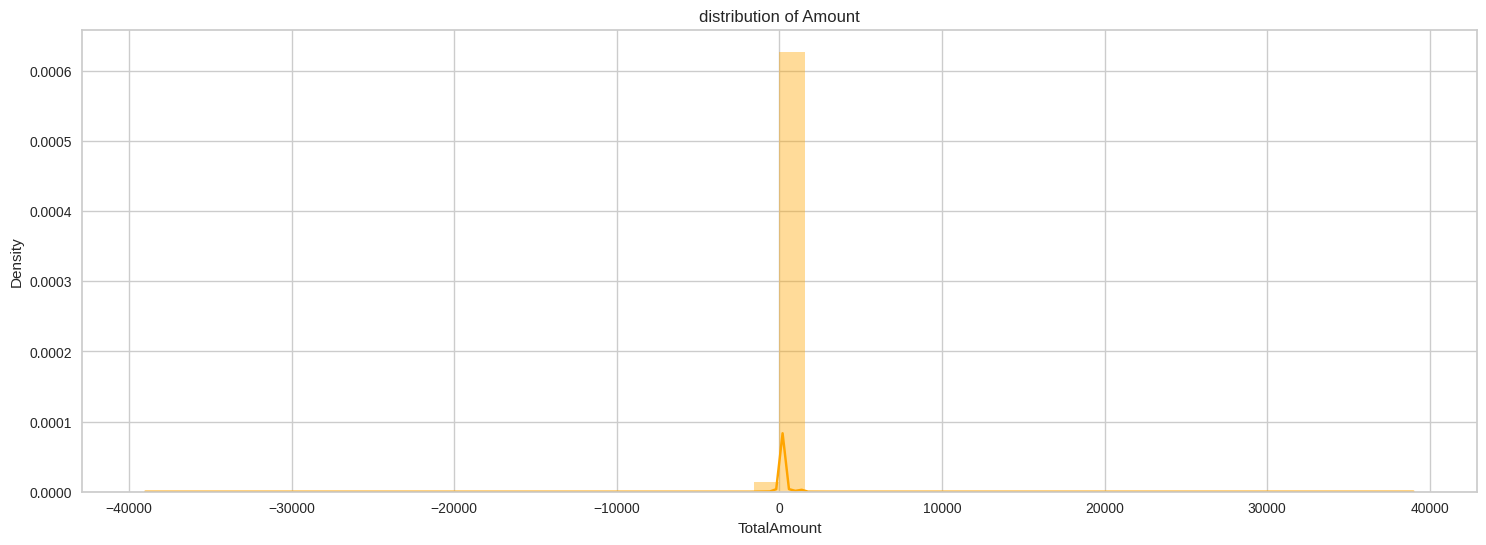

In [90]:
plt.figure(figsize=(18,6))
plt.title('distribution of Amount')
sns.distplot(df['TotalAmount'],color="orange")

In [91]:
df['TotalAmount'].describe()

count    401598.000000
mean         20.614645
std         119.129211
min      -38970.000000
25%           4.250000
50%          11.700000
75%          19.800000
max       38970.000000
Name: TotalAmount, dtype: float64

<Axes: >

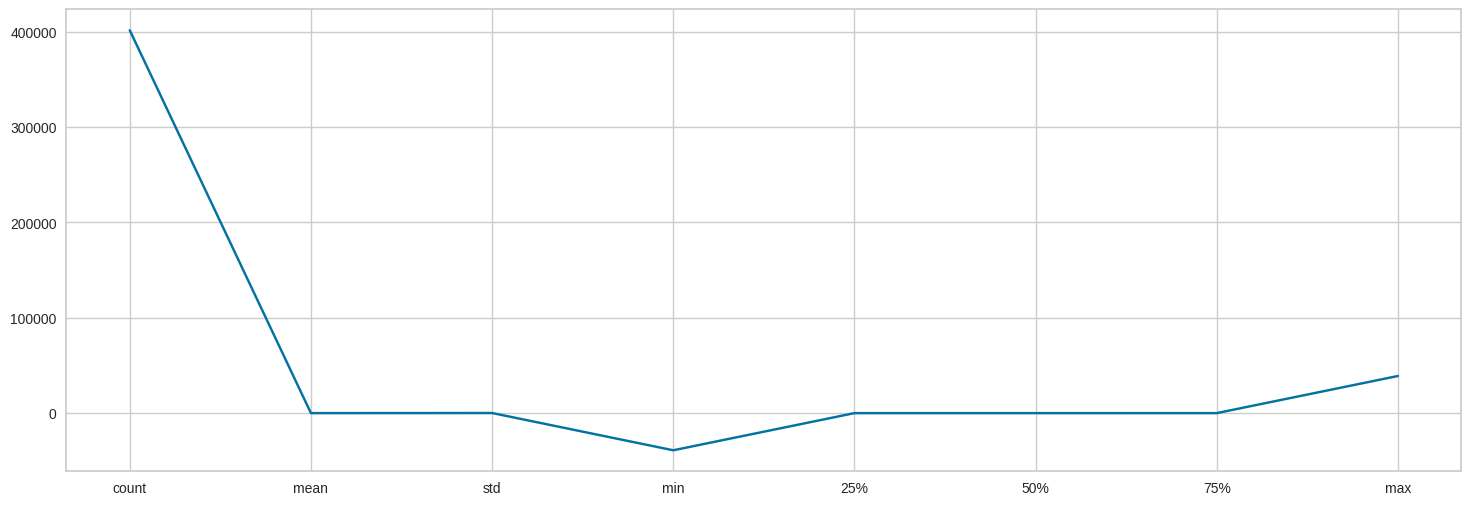

In [92]:
plt.figure(figsize=(18,6))
df['TotalAmount'].describe().plot()

In [93]:
day_df=df['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)
day_df

Day_Name  Count
0   Thursday  81574
1  Wednesday  69753
2    Tuesday  67374
3     Monday  65715
4     Sunday  61673
5     Friday  55509

<Axes: title={'center': 'Day'}, xlabel='Day_Name', ylabel='Count'>

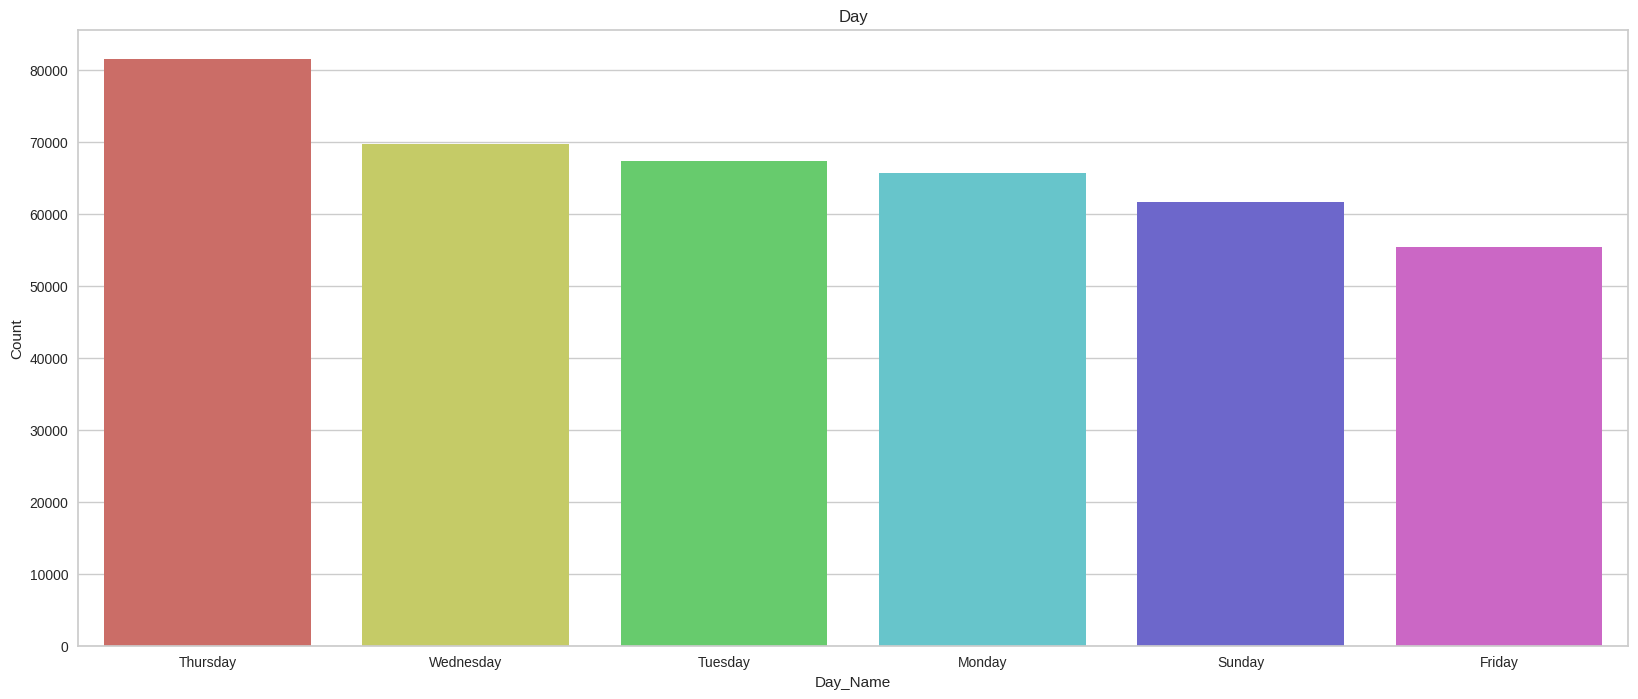

In [94]:
plt.figure(figsize=(20,8))
plt.title('Day')
sns.barplot(x='Day_Name',y='Count',data=day_df,palette='hls')

* **Most of the customers have purches the items in Thursday ,Wednesday and Tuesday**

In [95]:
month_df=df['InvoiceDate_month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'InvoiceDate_month': 'Count'}, inplace=True)
month_df

Month_Name  Count
0           11  64231
1           10  49928
2           12  43733
3            9  40459
4            5  28661
5            6  27576
6            3  27516
7            8  27444
8            7  27256
9            4  22988
10           1  21668
11           2  20138

<Axes: title={'center': 'Month'}, xlabel='Month_Name', ylabel='Count'>

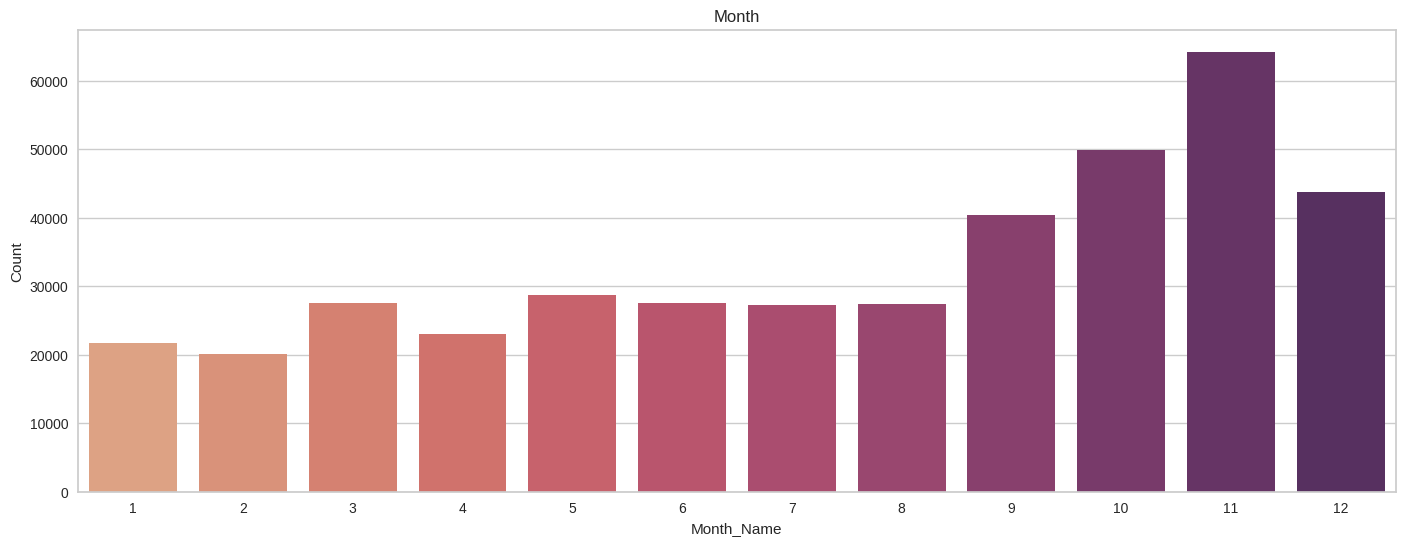

In [96]:
plt.figure(figsize=(17,6))
plt.title('Month')
sns.barplot(x='Month_Name',y='Count',data=month_df,palette='flare')

* **most numbers of customers have purches the gifts in the month of November ,October and December September**

* **less numbers of customers have purches the gifts in the month of April ,january and February**

In [97]:
hour_df=df['InvoiceDate_hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name'}, inplace=True)
hour_df.rename(columns={'InvoiceDate_hour': 'Count'}, inplace=True)
hour_df

Hour_Name  Count
0          12  72213
1          13  64051
2          14  54193
3          11  49525
4          15  45640
5          10  38723
6          16  24618
7           9  22444
8          17  13604
9           8   8789
10         19   3423
11         18   3104
12         20    847
13          7    383
14          6     41

<Axes: title={'center': 'Hour'}, xlabel='Hour_Name', ylabel='Count'>

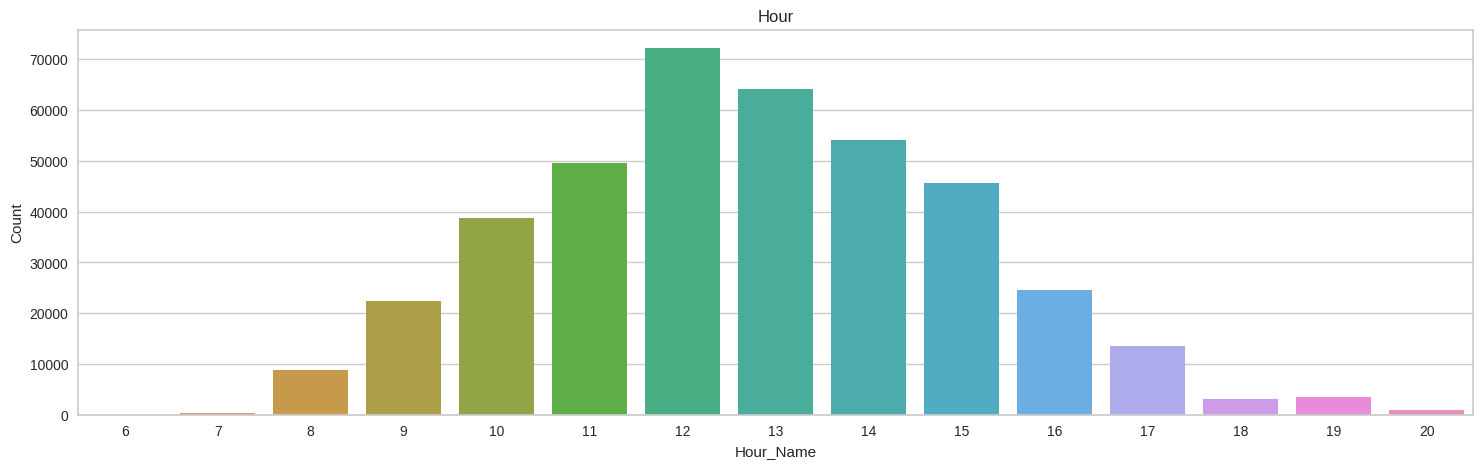

In [98]:
plt.figure(figsize=(18,5))
plt.title('Hour')
sns.barplot(x='Hour_Name',y='Count',data=hour_df)

* **From this graph we can see that in AfterNone Time most of the customers have purches the item.**

In [99]:
def time_type(time):
  if(time==6 or time==7 or time==8 or time==9 or time==10 or time==11):
    return 'Morning'
  elif(time==12 or time==13 or time==14 or time==15 or time==16 or time==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [100]:
df['Time_type']=df['InvoiceDate_hour'].apply(time_type)

<Axes: title={'center': 'Time_type'}, xlabel='Time_type', ylabel='count'>

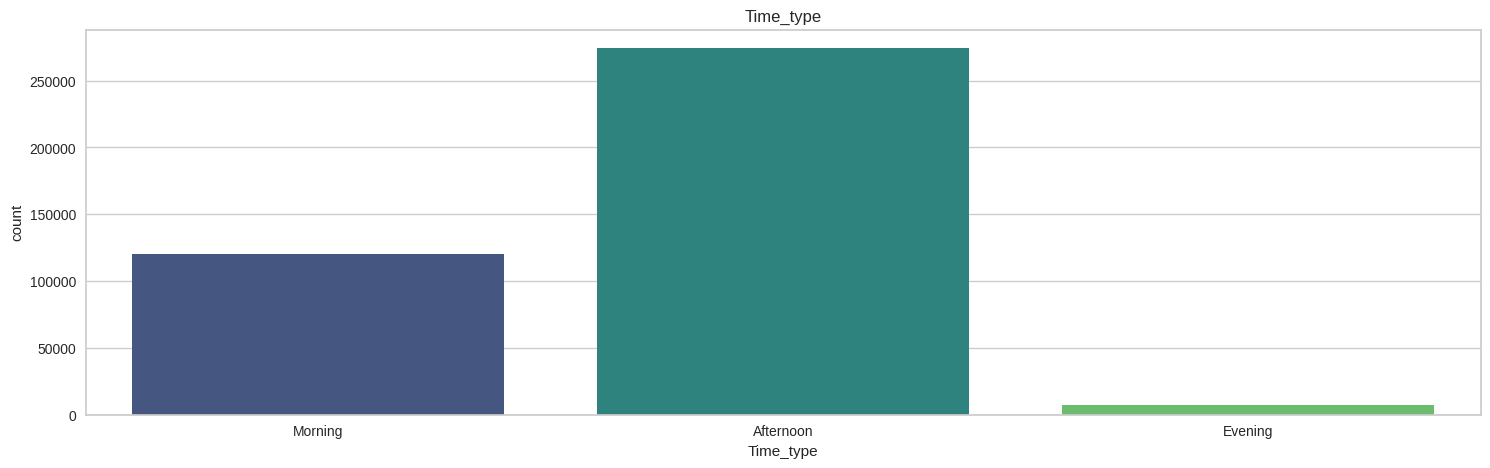

In [101]:
plt.figure(figsize=(18,5))
plt.title('Time_type')
sns.countplot(x='Time_type',data=df,palette="viridis")

* **Most of the customers have purches the items in Aftrnoon ,moderate numbers of customers have purches the items in Morning and least numbers of customers have purches the items in Evening**

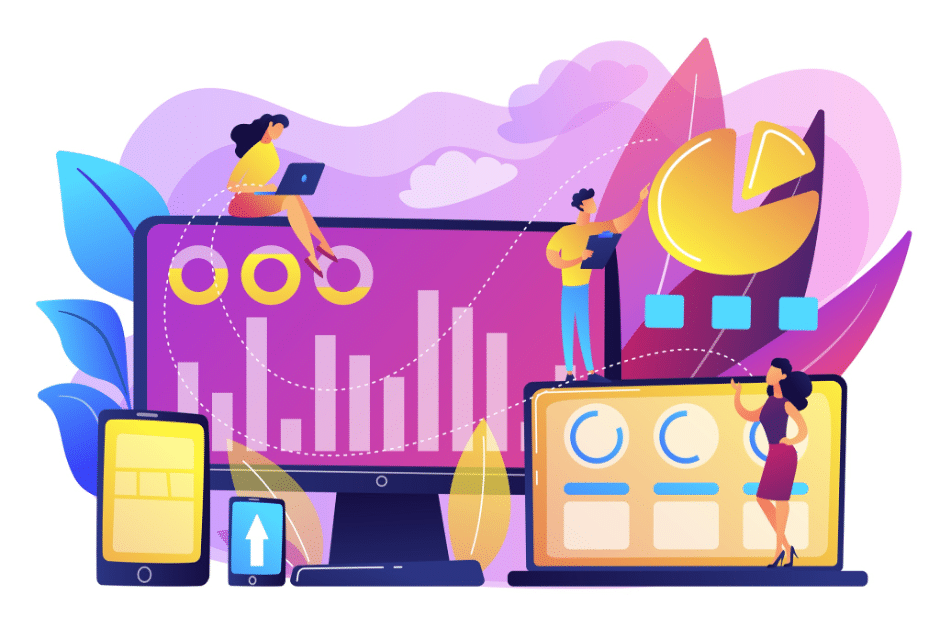

## ***7. RFM model (Recency, Frequency, and Monetary value)***

Using the RFM model, a marketing analysis technique, businesses can segment their clients according to how they behave and make purchases. Recency, Frequency, and Monetary Value are abbreviated as RFM.


1. How recently a customer has made a purchase is referred to as their recency. Customers who have recently made a purchase are viewed as being more engaged and valuable.


2. The frequency of a customer's purchases is referred to as frequency. Customers that shop more frequently are viewed as being more dependable and valuable.


3. Frequency is the number of times a customer makes a purchase. Customers who make more frequent purchases are seen as more trustworthy and valued.



Businesses can segment their customer base into distinct groups depending on consumer behaviour by looking at these three variables, and then they can adjust their marketing plans appropriately. For instance, the most valued consumers would be those that just made a purchase, made several transactions, and spent a lot of money. These customers may be targeted with special deals or loyalty programmes to keep their business. In contrast, various messaging and incentives may be directed at customers who haven't made a purchase in a while, make sporadic purchases, and spend little money in an effort to persuade them to interact with the business more frequently.

### Calculating Recency, Frequency and Monetary.

In [102]:
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.date(2011,12,10)

#Create RFM values for each customer
rfm_df = df.groupby('CustomerID').agg({'date': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalPrice': lambda x: x.sum()})

#Rename column names to Recency, Frequency and Monetary
rfm_df.rename(columns={'date': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalPrice': 'Monetary'}, inplace=True)

rfm_df.reset_index().head()

CustomerID  Recency  Frequency  Monetary
0     12347.0        3        182   4310.00
1     12348.0       76         31   1797.24
2     12349.0       19         73   1757.55
3     12350.0      311         17    334.40
4     12352.0       37         95   1545.41

In [103]:
# data summary of Recency, Frequency, and Monetary 
rfm_df.describe()

Recency    Frequency       Monetary
count  4370.000000  4370.000000    4370.000000
mean     92.592449    91.898856    1894.462294
std     100.731569   229.267972    8220.724284
min       1.000000     1.000000   -4287.630000
25%      17.000000    17.000000     292.002500
50%      51.000000    41.000000     644.270000
75%     144.000000    99.750000    1609.545000
max     374.000000  7812.000000  279489.020000

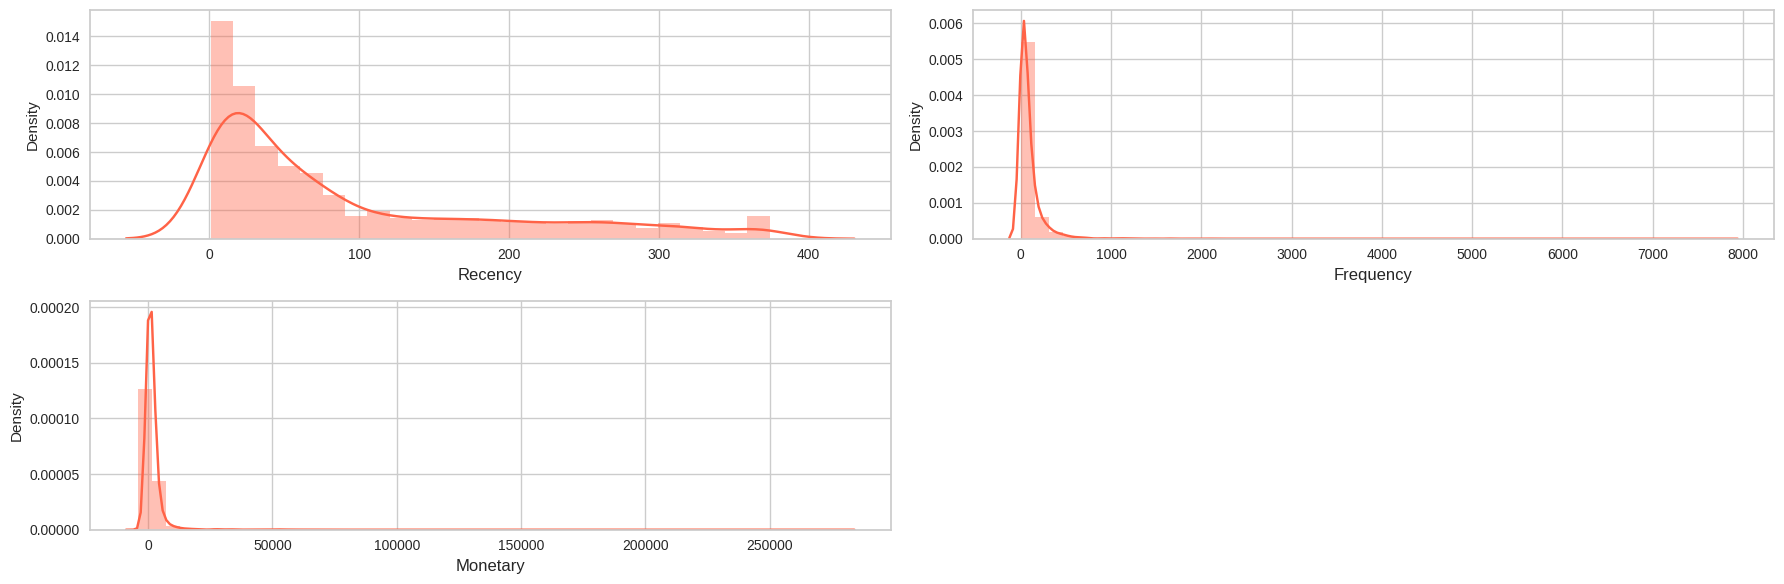

In [104]:
# ploting distributions of Recency, Frequency, and Monetary 
fig = plt.figure(figsize=(18,6))
c=1
for i in ['Recency' , 'Frequency', 'Monetary'] :
    plt.subplot(2, 2, c)
    plt.xlabel(i, fontsize = 12)
    sns.distplot(rfm_df[i],color="tomato")
    c = c + 1
plt.tight_layout()

### Calculating RFM scores.

In [105]:
# geting Q1, Q2 and Q3 
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 17.0, 0.5: 51.0, 0.75: 144.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.75},
 'Monetary': {0.25: 292.00249999999994, 0.5: 644.27, 0.75: 1609.5449999999996}}

#### Giving R, F and M score from 1 to 4 where four is the best score and one is worse..

In [106]:
#Functions to calculate R, F and M scoring
def Rscoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
def FandMscoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [107]:
# Calculating and creating  R, F and M scores columns.
rfm_df['R'] = rfm_df['Recency'].apply(Rscoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FandMscoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FandMscoring, args=('Monetary',quantiles,))
rfm_df.head()

Recency  Frequency  Monetary  R  F  M
CustomerID                                       
12347.0           3        182   4310.00  4  4  4
12348.0          76         31   1797.24  2  2  4
12349.0          19         73   1757.55  3  3  4
12350.0         311         17    334.40  1  1  2
12352.0          37         95   1545.41  3  3  3

In [108]:
# Assigning and creating RFM_group column showing combined concatenated score of RFM.
rfm_df['RFM_group'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)

# Assigning and creating RFM_score column showing total sum of R, F and M scores.
rfm_df['RFM_score'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

Recency  Frequency  Monetary  R  F  M RFM_group  RFM_score
CustomerID                                                            
12347.0           3        182   4310.00  4  4  4       444         12
12348.0          76         31   1797.24  2  2  4       224          8
12349.0          19         73   1757.55  3  3  4       334         10
12350.0         311         17    334.40  1  1  2       112          4
12352.0          37         95   1545.41  3  3  3       333          9

* RFM_group: RFM_group is the sum of the R, F, and M scores, with 444 being the best and 111 being the worst. 
* RFM_score: Where 12 is the greatest and best score and 3 is the lowest and worse score, RFM_score is the total of R, F, and M scores.


In [109]:
# unique values
rfm_df['RFM_group'].unique()

array(['444', '224', '334', '112', '333', '111', '133', '344', '423',
       '244', '222', '433', '122', '411', '233', '323', '422', '134',
       '223', '434', '144', '322', '332', '312', '123', '124', '311',
       '212', '221', '234', '213', '121', '342', '424', '421', '211',
       '313', '241', '143', '432', '242', '114', '113', '412', '414',
       '214', '324', '343', '231', '243', '132', '443', '413', '321',
       '442', '131', '232', '331', '431', '314', '142', '441'],
      dtype=object)

In [110]:
# unique values
rfm_df['RFM_score'].unique()

array([12,  8, 10,  4,  9,  3,  7, 11,  6,  5])

### Data Transformation using PowerTransformer 

In [111]:
# handling zero and negative values before transformation
rfm_df['Monetary'] = rfm_df['Monetary'].apply(lambda x : 1 if x < 1 else x)

In [112]:
# input variables
rfm_df = rfm_df[['Recency', 'Frequency', 'Monetary']]

# Data Transformation using PowerTransformer
transformer = PowerTransformer()
# fit_transform
trans_df = transformer.fit_transform(rfm_df)

# converting scaled array to dataFrame
trans_df = pd.DataFrame(trans_df)
trans_df.columns = ['Monetary', 'Frequency', 'Recency']

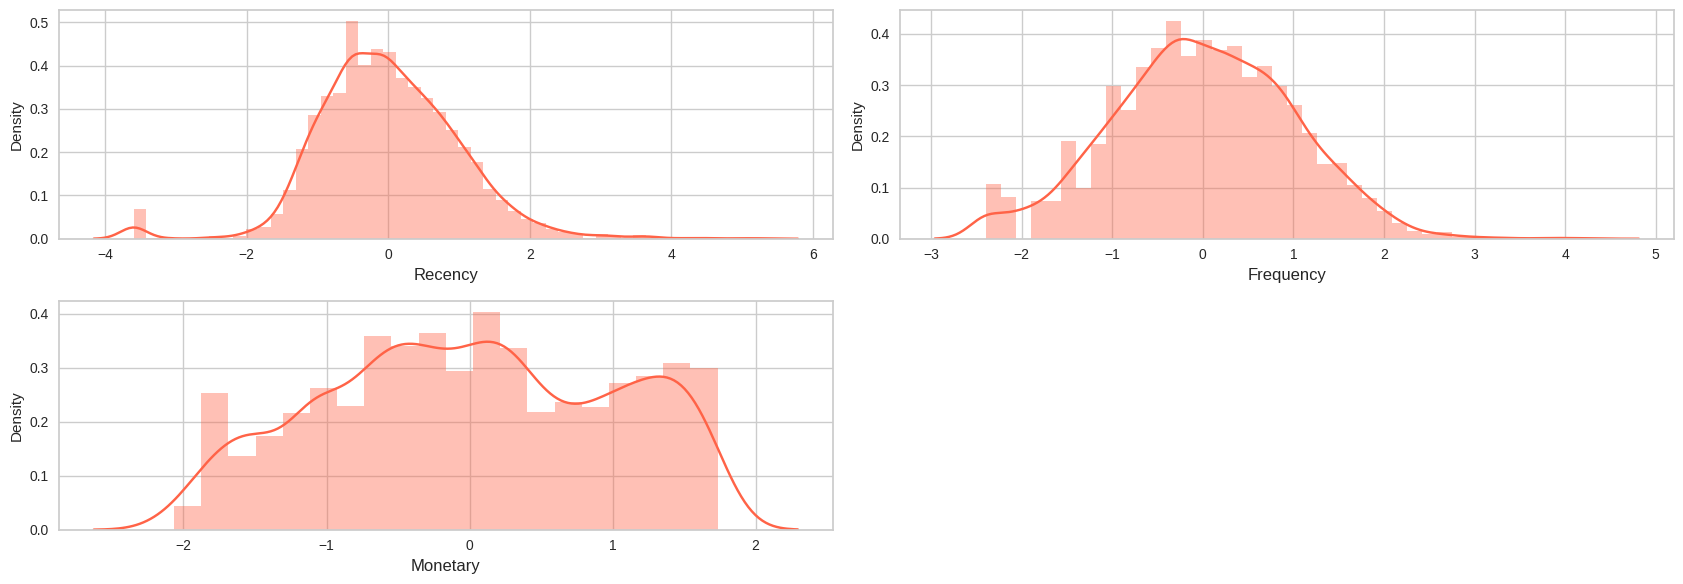

In [113]:
# ploting distributions after transformation
fig = plt.figure(figsize=(17,6))
c=1
for i in ['Recency' , 'Frequency', 'Monetary'] :
    plt.subplot(2, 2, c)
    plt.xlabel(i, fontsize = 12)
    sns.distplot(trans_df[i],color="tomato")
    c = c + 1
plt.tight_layout()

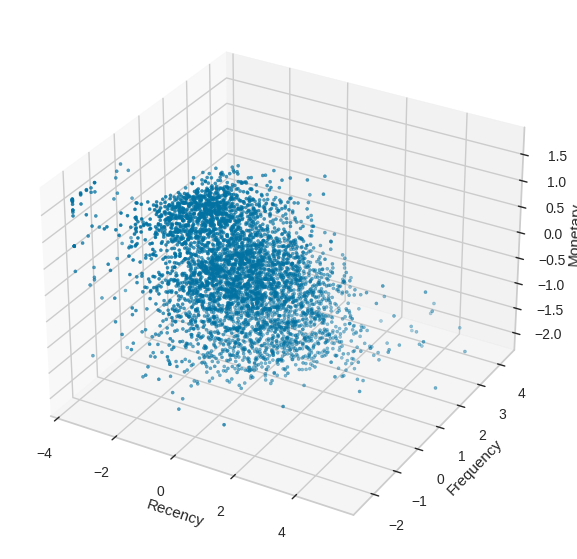

In [114]:
# Importing Library for 3D plot
from mpl_toolkits.mplot3d import Axes3D

# set fig size
fig=plt.figure(figsize=(17,7))

# syntax for 3-D plotting
ax=fig.add_subplot(projection='3d')

# syntax for plotting
x = trans_df.Recency
y = trans_df.Frequency
z = trans_df.Monetary
ax.scatter(x,y,z,s=5)

# set x, y & z label
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

# show the plot
plt.show()

## ***7.1. ML Model Implementation***

### **ML Model - 1. K-Means Clustering**

#### Silhouette analysis
A method called silhouette analysis is used to assess how well a clustering algorithm creates its clusters. Each data point in the dataset is given a silhouette coefficient, which quantifies how similar it is to its own cluster in comparison to other clusters.


The silhouette coefficient has a range of values between -1 and 1, with values closer to 1 suggesting that the data point is well-suited to its cluster and values closer to -1 indicating that the data point would be better matched to a different cluster. When the value is 0, the data point lies on the border of two clusters.


The data must first be clustered using a clustering algorithm like k-means before performing silhouette analysis. The silhouette coefficient for each data point is determined once the clusters have formed using the following formula:

frac(b(i) - a(i)) = s(i)maximum(a(i), b(i))$

where a(i) represents the average distance between i and all other points in the same cluster, b(i) represents the average distance between i and all points in the closest neighbouring cluster, or the cluster with the least average distance to i, and s(i) represents the silhouette coefficient for the i-th data point.


#### Determining the best value of k using silhoutte method.
The best value of k, or the number of clusters for a given dataset, can be found using the silhouette approach. In order to achieve this, one can compute the average silhouette coefficient for each value of k and then pick the value that maximises this metric.


In [115]:
# input variables
rfm_df = rfm_df[['Recency', 'Frequency', 'Monetary']]

# data scaling using StandardScaler
scaler = StandardScaler()
# fit_transform
X = scaler.fit_transform(rfm_df)

In [116]:
# determining the best value of k using silhoutte method
for k in range(2,11):
  model = KMeans(k)
  preds = model.fit_predict(X)
  centers = model.cluster_centers_
  # getting silhoutte score
  score = silhouette_score(X, preds)
  print("For n_clusters = {}, silhouette score is {}".format(k, score))        

For n_clusters = 2, silhouette score is 0.9294570418850548
For n_clusters = 3, silhouette score is 0.6002673862813273
For n_clusters = 4, silhouette score is 0.6000511747180888
For n_clusters = 5, silhouette score is 0.6169961215111206
For n_clusters = 6, silhouette score is 0.5169545664744776
For n_clusters = 7, silhouette score is 0.5240307584524755
For n_clusters = 8, silhouette score is 0.5003422401093287
For n_clusters = 9, silhouette score is 0.4992379572163614
For n_clusters = 10, silhouette score is 0.4737038311276124


For n_clusters = 2, the best silhoutte score was obtained. For n_clusters = 5, the second-best silhoutte score was obtained. For n_clusters = 3, a good score was also obtained.


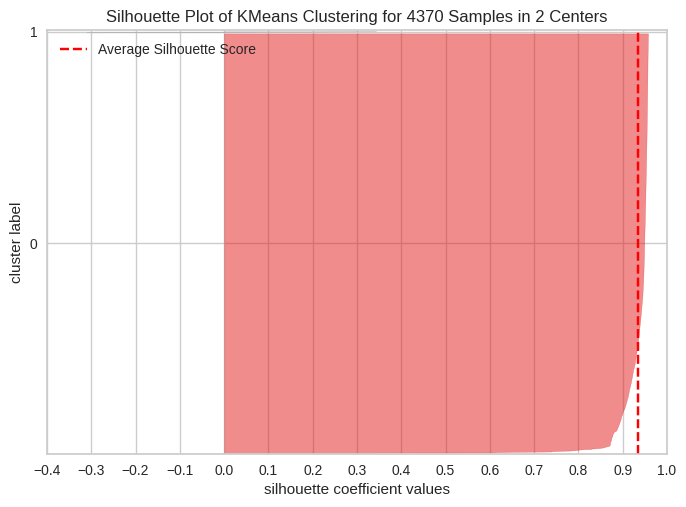

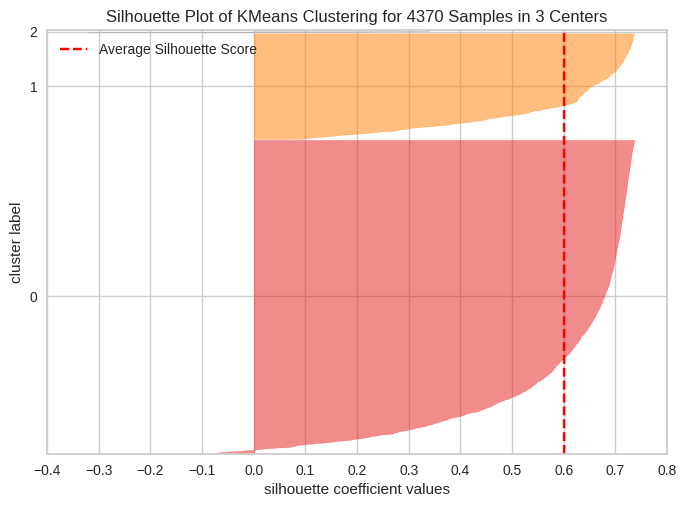

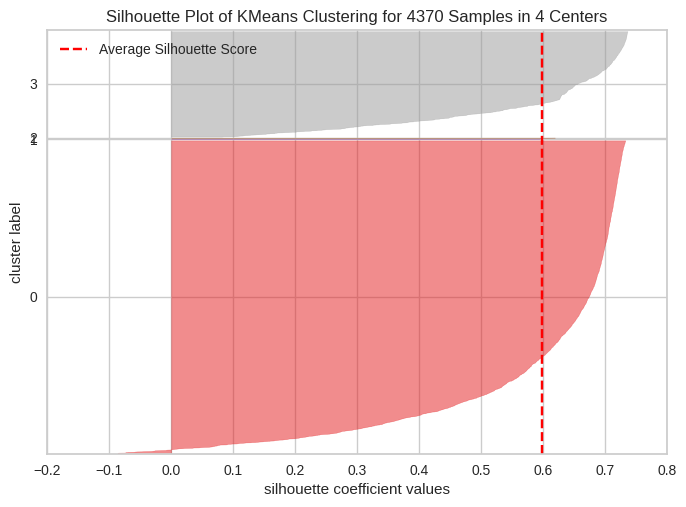

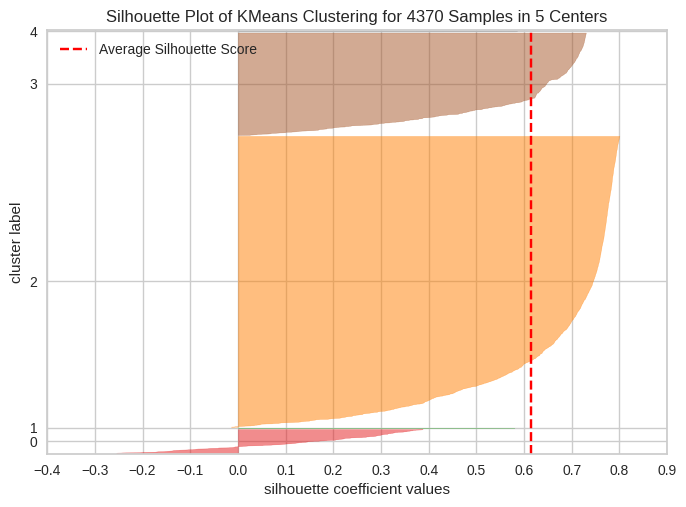

In [117]:
# Silhouette plot
for k in range(2,6):
  model = KMeans(k)
  visualizer = SilhouetteVisualizer(model, color = 'yellowbrick')
  # Fit the data to the visualizer
  visualizer.fit(X)       
  # Finalize and render the figure 
  visualizer.show()

#### Using Elbow method to find optimal number of clusters.

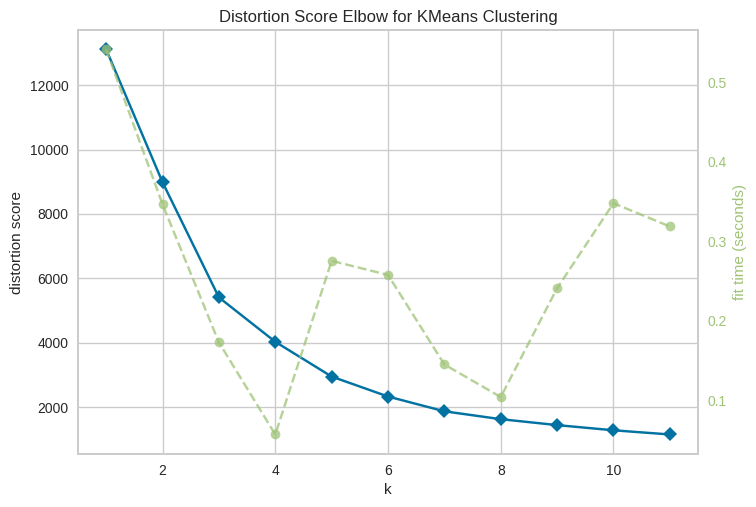

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [118]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12), locate_elbow = False)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

* According to the Elbow curve, three clusters are the ideal number.
 

#### Fitting kmeans with n_clusters = 3

In [119]:
# kmeans clustering with k = 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# assigning cluster labels
rfm_df['kmeans_clusters'] = kmeans.labels_
rfm_df.head()

Recency  Frequency  Monetary  kmeans_clusters
CustomerID                                               
12347.0           3        182   4310.00                0
12348.0          76         31   1797.24                0
12349.0          19         73   1757.55                0
12350.0         311         17    334.40                2
12352.0          37         95   1545.41                0

#### **Clusters Profiling**

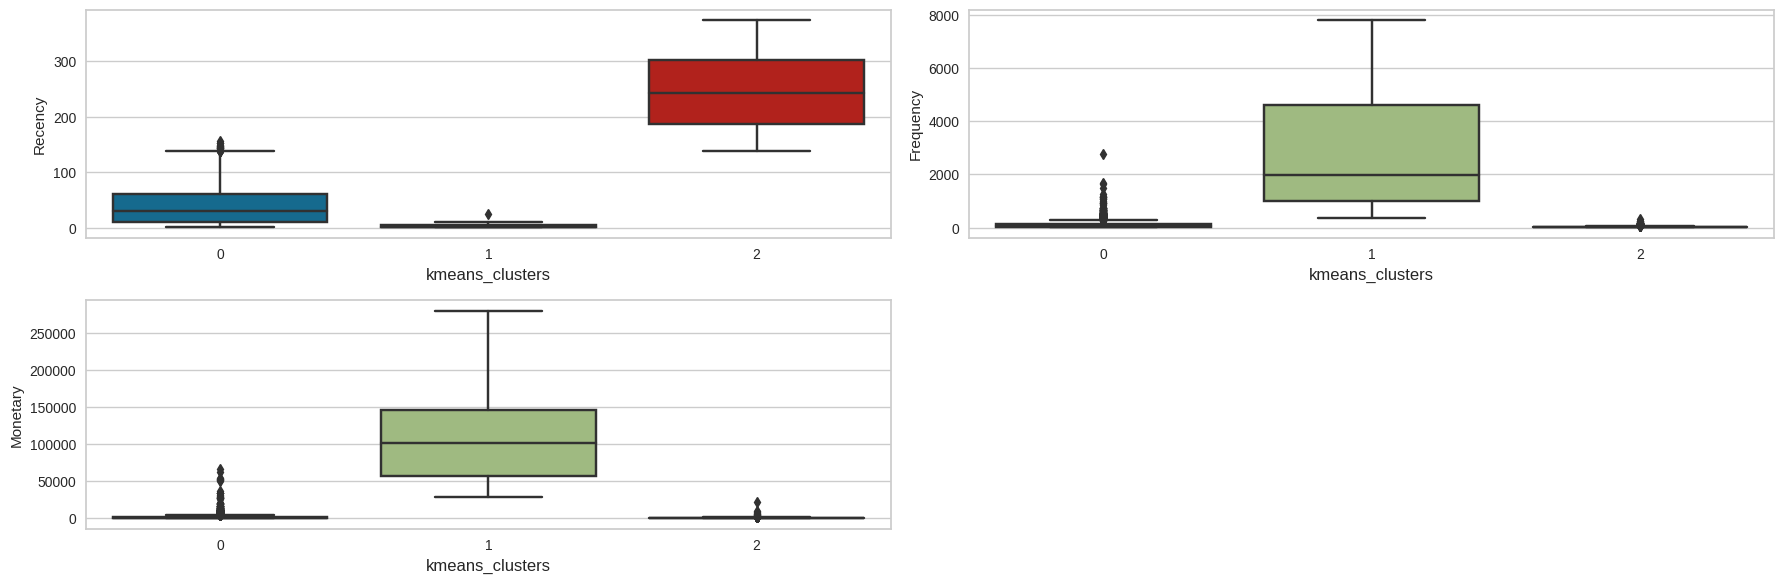

In [120]:
# box plots
fig = plt.figure(figsize=(18,6))
c=1
for i in ['Recency' , 'Frequency', 'Monetary'] :
    plt.subplot(2, 2, c)
    plt.xlabel(i, fontsize = 12)
    sns.boxplot(x='kmeans_clusters', y=i, data=rfm_df)
    c = c + 1
plt.tight_layout()

In [121]:
# cluster label_0 summary
rfm_df[rfm_df['kmeans_clusters'] == 0][['Recency', 'Frequency', 'Monetary']].describe()

Recency    Frequency      Monetary
count  3258.000000  3258.000000   3258.000000
mean     40.686004   103.667894   1948.808119
std      35.297124   146.236058   4014.782128
min       1.000000     1.000000      1.000000
25%      11.000000    25.000000    397.007500
50%      30.000000    57.000000    896.715000
75%      62.000000   124.000000   2043.877500
max     157.000000  2759.000000  65892.080000

The 3258 clients in cluster label_0 have an average recency of 40, an average frequency of 103, and an average revenue of about 1950 dollars.

 

In [122]:
# cluster label_1 summary
rfm_df[rfm_df['kmeans_clusters'] == 1][['Recency', 'Frequency', 'Monetary']].describe()

Recency    Frequency       Monetary
count  12.000000    12.000000      12.000000
mean    5.333333  2813.750000  118564.639167
std     6.893123  2430.546819   83213.912810
min     1.000000   350.000000   28405.560000
25%     1.750000  1001.500000   57271.825000
50%     2.500000  1969.000000  100669.985000
75%     6.000000  4626.250000  146174.590000
max    25.000000  7812.000000  279489.020000

* cluster label_1 contains 1100 customers with average recency of 247 and minimun recency of 138 which means these customers have not made any purchase in last 4 months, 
* average frequency is 27 only, and average monetary is around 472 dollars which is also very low in comparison of cluster_0.

In [123]:
# cluster label_1 summary
rfm_df[rfm_df['kmeans_clusters'] == 2][['Recency', 'Frequency', 'Monetary']].describe()

Recency    Frequency      Monetary
count  1100.000000  1100.000000   1100.000000
mean    247.281818    27.348182    472.808946
std      68.002801    31.359921    923.627004
min     139.000000     1.000000      1.000000
25%     187.750000     8.000000    155.305000
50%     242.000000    18.000000    294.270000
75%     302.000000    33.000000    505.912500
max     374.000000   309.000000  21535.900000

* cluster label_2 contains only 12 customers with max recency of 25 and average recency 5 only which is very good, average frequency equals to 2813, and average monetary is more than 100k dollars which are very high compared to cluster_0 and cluster_1.

**Naming above clusters according to their data summary :**
* cluster_0 : **Regular**
* cluster_1 : **Not so regular**
* cluster_2 : **Premium**

### **ML Model - 2. Hierarchical Clustering**

#### Dendogram to find the optimal number of clusters.


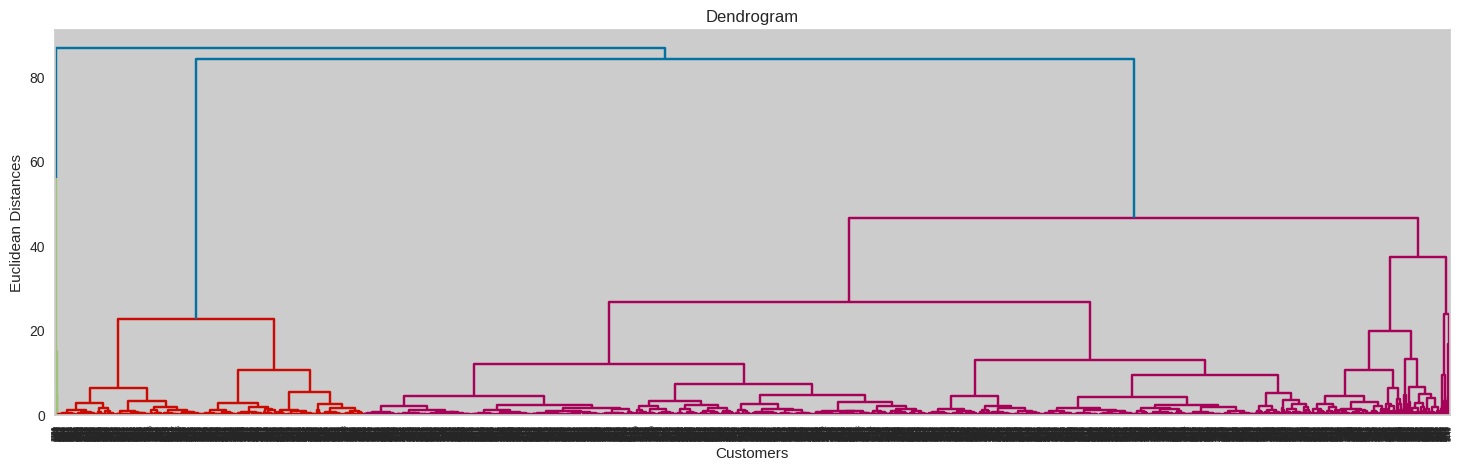

In [124]:
# dendogram
plt.figure(figsize=(18,5))
linkage_data = linkage(X, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

#### Fitting agglomerative hierarchical clustering with n_clusters = 3

In [125]:
# Agglomerative hierarchical clustering with n_clusters = 3.
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
hc.fit_predict(X)

# assigning cluster labels
rfm_df['hierarchical_clusters'] = hc.labels_
rfm_df.head()

Recency  Frequency  Monetary  kmeans_clusters  \
CustomerID                                                  
12347.0           3        182   4310.00                0   
12348.0          76         31   1797.24                0   
12349.0          19         73   1757.55                0   
12350.0         311         17    334.40                2   
12352.0          37         95   1545.41                0   

            hierarchical_clusters  
CustomerID                         
12347.0                         1  
12348.0                         1  
12349.0                         1  
12350.0                         2  
12352.0                         1

#### **Cluster Profiling** 

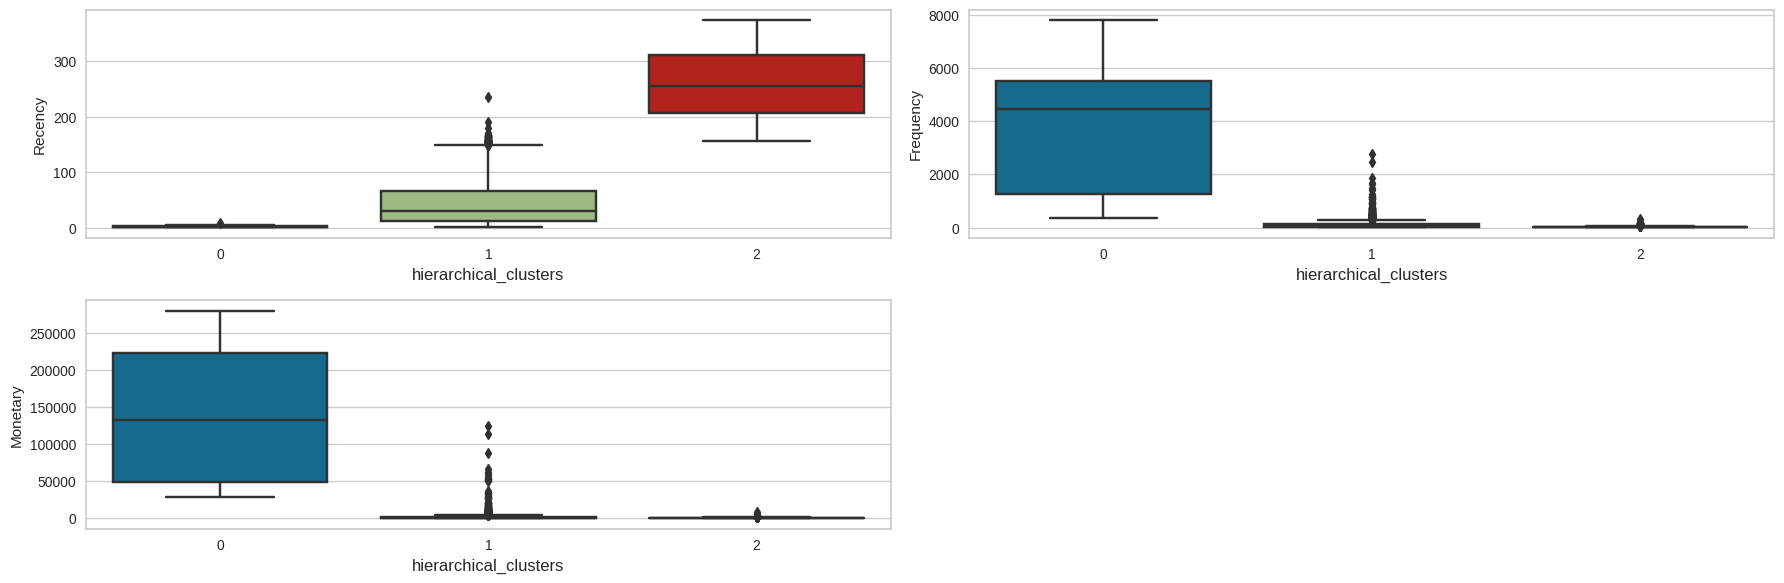

In [126]:
# box plots
fig = plt.figure(figsize=(18,6))
c=1
for i in ['Recency' , 'Frequency', 'Monetary'] :
    plt.subplot(2, 2, c)
    plt.xlabel(i, fontsize = 12)
    sns.boxplot(x='hierarchical_clusters', y=i, data=rfm_df)
    c = c + 1
plt.tight_layout()

In [127]:
# cluster label_0 summary
rfm_df[rfm_df['hierarchical_clusters'] == 0][['Recency', 'Frequency', 'Monetary']].describe()

Recency    Frequency       Monetary
count  7.000000     7.000000       7.000000
mean   3.142857  3737.857143  140157.704286
std    2.911390  2853.331236  103810.454541
min    1.000000   350.000000   28405.560000
25%    1.500000  1259.000000   48494.980000
50%    2.000000  4459.000000  132458.730000
75%    3.500000  5513.000000  221880.330000
max    9.000000  7812.000000  279489.020000

* Only 7 customers make up cluster label_0, with a maximum recency of 9 and an average recency of 3, a frequency of more than 3k, and an average spending amount of about 140k dollars.


In [128]:
# cluster label_1 summary
rfm_df[rfm_df['hierarchical_clusters'] == 1][['Recency', 'Frequency', 'Monetary']].describe()

Recency    Frequency       Monetary
count  3403.000000  3403.000000    3403.000000
mean     45.309433   102.851308    2028.400874
std      41.331545   155.614230    5264.602972
min       1.000000     1.000000       1.000000
25%      12.000000    24.000000     378.765000
50%      31.000000    54.000000     860.410000
75%      67.000000   122.000000    1988.725000
max     236.000000  2759.000000  123725.450000

* cluster label_1 contains 3403 customers with average recency of 45 days, average frequency is 102, and average monetary is around 2k dollars.

In [129]:
# cluster label_2 summary
rfm_df[rfm_df['hierarchical_clusters'] == 2][['Recency', 'Frequency', 'Monetary']].describe()

Recency   Frequency     Monetary
count  960.000000  960.000000   960.000000
mean   260.853125   26.489583   425.344022
std     61.918227   29.834718   542.056901
min    157.000000    1.000000     1.000000
25%    206.750000    8.000000   154.997500
50%    256.000000   18.000000   291.025000
75%    310.250000   31.250000   483.940000
max    374.000000  309.000000  7741.470000

With an average recency of 260 and a minimum recency of 157, customers in cluster label_2 have not made a purchase in the previous five months. Additionally, there are 960 customers in this cluster, which is quite few compared to other clusters.


**Naming above clusters according to their data summary :**
* cluster_0 : **Premium**
* cluster_1 : **Regular**
* cluster_2 : **Not so regular**

# **Conclusion**

### **Conclusion on EDA :**

After analysing the datasets, we were able to find answers to some important and intriguing issues that would help businesses better understand their target markets and the items they are selling, thereby enabling them to expand and generate more revenue.


#### **Instances & Observations we discovered after Analyzing the datasets:**

### Product level analysis
* A total of 3683 different goods are available.


* The top ten items by sales volume are 84077, 22197, 85099B, 84879, 85123A, 21212, 23084, 22492, and 22616. The item with the most sales volume, 21977, had nearly 24k units sold. 
* Additionally, more than 300 products have sold quantities of less than 10.

* More than 400 products have only had less than five orders placed for them.

* More than 400 products have only had less than five orders placed for them.

* With a unit price of $49.95, 22833 is the tenth most expensive product overall, but it has the highest sales volume of 149 units.

* The product with the lowest price, 16045, has the biggest sales volume among the 10 products with the lowest prices, 8900.

* The top 10 products account for 8.28% of total sales.

* '22423', '85123A', '85099B', '47566', 'POST', '84879', '23084', '22502', '79321', and '22086' are the top 10 items with the greatest sale value.

* The highest transaction price for Stockcode 22423 was more than $130,000.

* Less than $100 is the sale price of 23% of the products.

* By creating a word cloud, it was discovered that items like light holders, water bottles, hanging hearts, lunch bags, dolls, red retrospots, metal signs, Christmas, and giant bags are commonly requested.



### Customer level analysis
* There are 4370 customers in total.

* The top 3 clients, "17841," "14911," and "14096," have a combined total of more than 5000 transactions.


* 13.5% of clients have made fewer than 10 transactions.

* 15.8% of transactions had 10 to 20.


* '14646', '18102', '17450', '14911', '12415', '14156', '17511', '16684', '13694', and '15311' are the top 10 consumers with the greatest purchase value.

* '14646' and '18102' are the two customers with the greatest purchase values, each over $250,000.

* 90% of clients spend less than $3,500 on their overall purchases.

* 99% of people have less than $17,000.

* Only 1% of customers make purchases totaling more than $17,000.


### Geographical analysis
* receiving orders from 37 various nations.


* United Kingdom alone accounts for 89% of orders and has the greatest client base (81.50% of total sales).

* Saudi Arabia and the Czech Republic have the fewest orders.

* USA and Czech Republic have the greatest percentages of cancelled orders (62% and 20%, respectively), meaning that 62% of all orders have been cancelled.


### DateTime analysis
* The volume of daily transactions increased in the third quarter.

* Closed on Saturday, don't get any orders on Saturday;
* average sale on Sunday is low compared to other weekdays;
* daily sale is high in second half compared to first half;
* highest sale in November; sale is high in last four months compared to other months;
* most orders are generated between 9am and 5pm; high number of orders in afternoon;
* moderate number of orders in morning; and fewest numbers of orders in evening.




## **Conclusion on Customer segmentation (Clustering) :**
Starting with the RFM model, we divided the client base into various groups according to their recentness, frequency, and monetary value. By calculating RFM_score and assigning RFM_group, we divided our clients into various categories.
* RFM_group: RFM_group is the sum of the R, F, and M scores, with 444 being the best and 111 being the worst. 
* RFM_score: Where 12 is the greatest and best score and 3 is the lowest and worse score, RFM_score is the total of R, F, and M scores.



After that, we created three clusters using the Kmeans clustering algorithm, the elbow approach, and the silhouette method.
* The 3258 clients in the first cluster label_0 have an average recency of 40, an average frequency of 103, and an average revenue of about 1950 dollars.

* The second cluster label_1 has 1100 consumers with an average recency of 247 and a minimum recency of 138, meaning that these customers have not made any purchases in the previous four months. Additionally, the second cluster label_1 has only a low average frequency of 27 and a very low average value of roughly $472, compared to the first cluster_0.
* The third cluster label_2 has just 12 clients, a maximum recency of 25, an average recency of only 5, an average frequency of 2813, and an average value of more than 100k dollars, all of which are significantly higher than those of clusters 0 and 1.


Then, using the agglomerative hierarchical clustering algorithm, we formed three clusters once more using the dendogram to determine the optimal number of clusters. These clusters resembled those produced by kmeans. These clusters are named Premium customers, regular customers, and not so regular customers towards the conclusion.

* Premium customers :Customers with very high frequency and monetary value but recent activity are considered premium customers.
* Regular customers :Customers with average frequency and monetary value but recent activity are considered regular customers.
* Not so regular customers: Customers haven't made any purchases in the recent 4–5 months, and the purchases they have made have been modest in value and frequency.